# Notebook to plot general distributions
**These are for the 'control plots' section in the note**

In [39]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import uproot
import uproot3
import R2h_module as r2h
import root_pandas as rpd
from root_pandas import read_root
from matplotlib import rc
import seaborn as sns
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
rc('font', weight='bold')
colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'
from matplotlib.colors import LogNorm ## this is for the 2d plots distributions

In [2]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

# Getting Data

In [3]:
%%time
df = {}
df_trigger = {}
#path_data="/home/seba/CreatePairTuples"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    df[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    df['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    df_trigger['%s_trigger'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    df_trigger['D_%s_trigger'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C
Get trigger dataframes from deuterium target C
Getting dataframes from target Fe
Get trigger dataframes from deuterium target Fe
Getting dataframes from target Pb
Get trigger dataframes from deuterium target Pb
CPU times: user 5.2 s, sys: 434 ms, total: 5.63 s
Wall time: 5.62 s


# Getting GiBUU

In [4]:
%%time

pathGIBUU="/home/miguel/eg2dihadron/"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    df_trigger['GiBUU_%s_trigger'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    df['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
print (df.keys())

D
 trigger
 pairs
C
 trigger
 pairs
Fe
 trigger
 pairs
Pb
 trigger
 pairs
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])
CPU times: user 14.9 s, sys: 483 ms, total: 15.4 s
Wall time: 15.4 s


# Apply selection to datasets


In [5]:
%%time
for key in df.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    df[key] = r2h.applyCuts(df[key],isMC=isMC)
    df[key] = r2h.applyCutsPair(df[key],isMC=isMC)
    
for key in df_trigger.keys():
    print (key)
    df_trigger[key] = r2h.applyCuts(df_trigger[key],isTrigger=True)
    print (' ')    


key:  C
Entries before cut  131591
Q2>1.0 and Q2<4.0 131591  (100.00  %)
h1_p<5.0  131585  (100.00  %)
inelasticity < 0.85 131585  (100.00  %)
h1_pid = pions (trigger) 131585  (100.00  %)
Nu>2.2 and Nu<4.2 129258  (98.23  %)
Starting election on dipion variables
This is Data
Q2>1.0 : 129258  (100.00  %)
2.2 < nu < 4.2 129258  (100.00  %)
h1_p<5 GeV  129258  (100.00  %)
h2_p<5 GeV 129258  (100.00  %)
secondary hadrons are pions 129258  (100.00  %)
leading hadrons are pions 129258  (100.00  %)
0.2<h2_p<5.0 129258  (100.00  %)
0.2<h1_p<5.0 129258  (100.00  %)
10<h2_th<120 129258  (100.00  %)
Theta/P fiducial region selected 129258  (100.00  %)
10< h1_th<120 129258  (100.00  %)
Theta/P fiducial region selected for trigger 129258  (100.00  %)

key:  D_C
Entries before cut  185530
Q2>1.0 and Q2<4.0 185530  (100.00  %)
h1_p<5.0  185525  (100.00  %)
inelasticity < 0.85 185525  (100.00  %)
h1_pid = pions (trigger) 185525  (100.00  %)
Nu>2.2 and Nu<4.2 182357  (98.29  %)
Starting election on di

Q2>1.0 and Q2<4.0 2046719  (99.95  %)
h1_p<5.0  2046719  (100.00  %)
inelasticity < 0.85 2046719  (100.00  %)
h1_pid = pions (trigger) 2046719  (100.00  %)
Nu>2.2 and Nu<4.2 1971713  (96.34  %)
 
GiBUU_C_trigger
Entries before cut  2011729
Q2>1.0 and Q2<4.0 2010807  (99.95  %)
h1_p<5.0  2010807  (100.00  %)
inelasticity < 0.85 2010807  (100.00  %)
h1_pid = pions (trigger) 2010807  (100.00  %)
Nu>2.2 and Nu<4.2 1936249  (96.29  %)
 
GiBUU_Fe_trigger
Entries before cut  874492
Q2>1.0 and Q2<4.0 874065  (99.95  %)
h1_p<5.0  874065  (100.00  %)
inelasticity < 0.85 874065  (100.00  %)
h1_pid = pions (trigger) 874065  (100.00  %)
Nu>2.2 and Nu<4.2 841499  (96.27  %)
 
GiBUU_Pb_trigger
Entries before cut  999262
Q2>1.0 and Q2<4.0 998733  (99.95  %)
h1_p<5.0  998733  (100.00  %)
inelasticity < 0.85 998733  (100.00  %)
h1_pid = pions (trigger) 998733  (100.00  %)
Nu>2.2 and Nu<4.2 961024  (96.22  %)
 
CPU times: user 8.36 s, sys: 3 s, total: 11.4 s
Wall time: 10.3 s


**Combine deuterium data sets**

In [6]:
df['D'] = pd.concat([df['D_Pb'],df['D_Fe'],df['D_C']])

In [7]:
p_thr=2.7
Nphe_thr=15
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%d*%d) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%d*%d) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%d*%d) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%d*%d) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%d*%d) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%d*%d) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%d*%d) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%d*%d) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%d*%d) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%d*%d) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

pair_cut_nom  ='and h1_z>0.5 and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and h2_FidCut==1 and %s and %s and %s and %s and %s and %s'%(Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
trigger_cut_nom   ='h1_z>0.5 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCut==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

for j,target in enumerate(['D','C','Fe','Pb']):    
    df[target].eval('h_z=h1_z+h2_z', inplace=True)
    df[target].eval('h1_e = h1_z*nu', inplace=True)
    df[target].eval('h1_p = sqrt(h1_e*h1_e-0.13957*0.13957)', inplace=True)
    df[target].eval('h2_e = h2_z*nu', inplace=True)
    df[target].eval('h2_p = sqrt(h2_e*h2_e-0.13957*0.13957)', inplace=True)
    df['GiBUU_%s'%target].eval('h_z=h1_z+h2_z', inplace=True)
    df['GiBUU_%s'%target].eval('h1_e = h1_z*nu', inplace=True)
    df['GiBUU_%s'%target].eval('h1_p = sqrt(h1_e*h1_e-0.13957*0.13957)', inplace=True)
    df['GiBUU_%s'%target].eval('h2_e = h2_z*nu', inplace=True)
    df['GiBUU_%s'%target].eval('h2_p = sqrt(h2_e*h2_e-0.13957*0.13957)', inplace=True)


In [ ]:
queryAllPairs    = 'Q2>1 %s'%pair_cut_nom
queryAllPosPions = 'Q2>1 %s and h1_pid==211 and abs(h2_pid)==211'%pair_cut_nom
queryAllNegPions = 'Q2>1 %s and h1_pid==-211 and abs(h2_pid)==211'%pair_cut_nom
## cuts for GiBUU

queryAllPairs_GiBUU    = 'Q2>1 and h1_z>0.5'
queryAllPosPions_GiBUU    = 'Q2>1 and h1_z>0.5 and h1_pid==211 and abs(h2_pid)==211'
queryAllNegPions_GiBUU    = 'Q2>1 and h1_z>0.5 and h1_pid==-211 and abs(h2_pid)==211'


# All pairs (data)

**As a function of $z_{2}$**

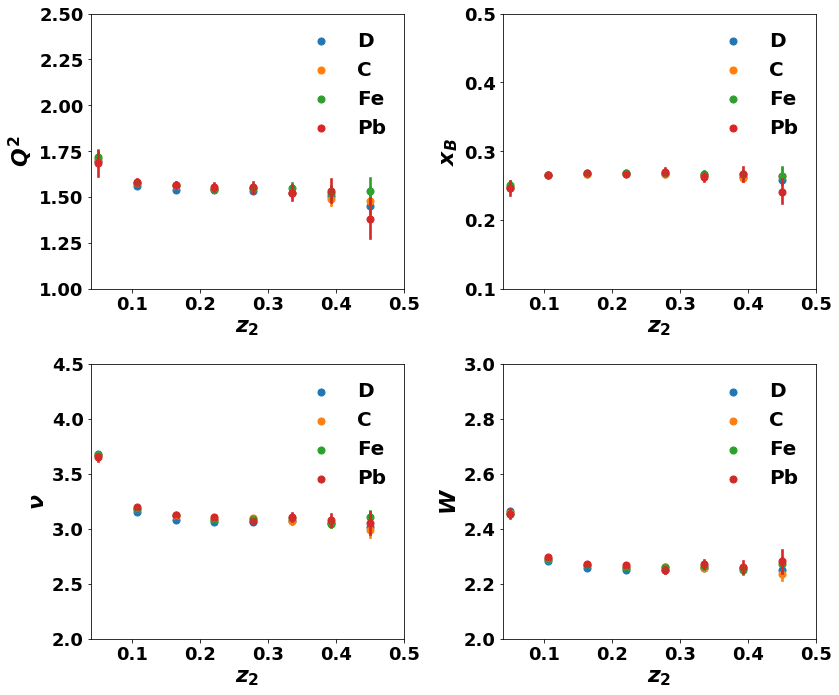

In [9]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPairs+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.04,0.5])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_1.pdf', bbox_inches='tight')
plt.show()

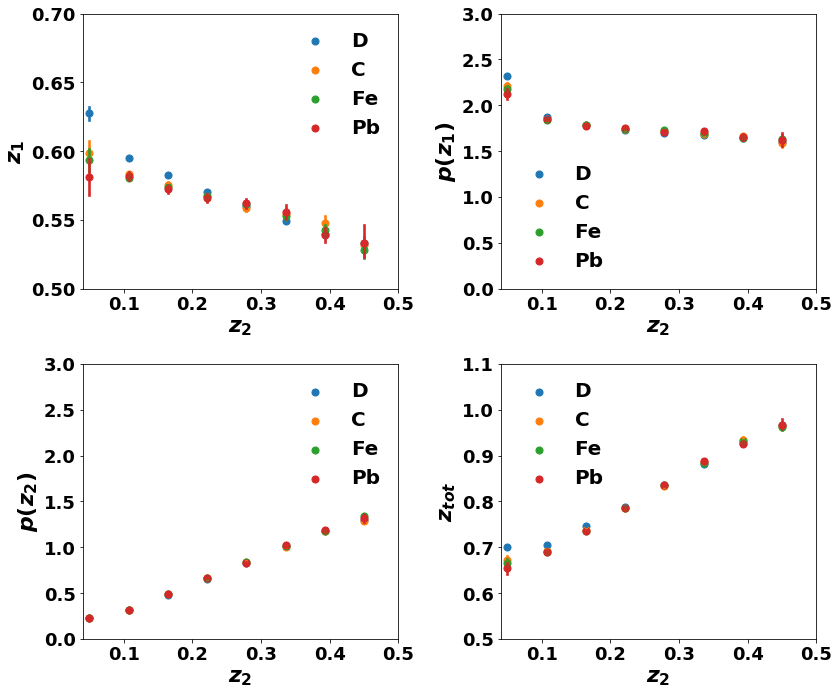

In [10]:
fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPairs+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)

    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')    
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_2.pdf', bbox_inches='tight')
plt.show()



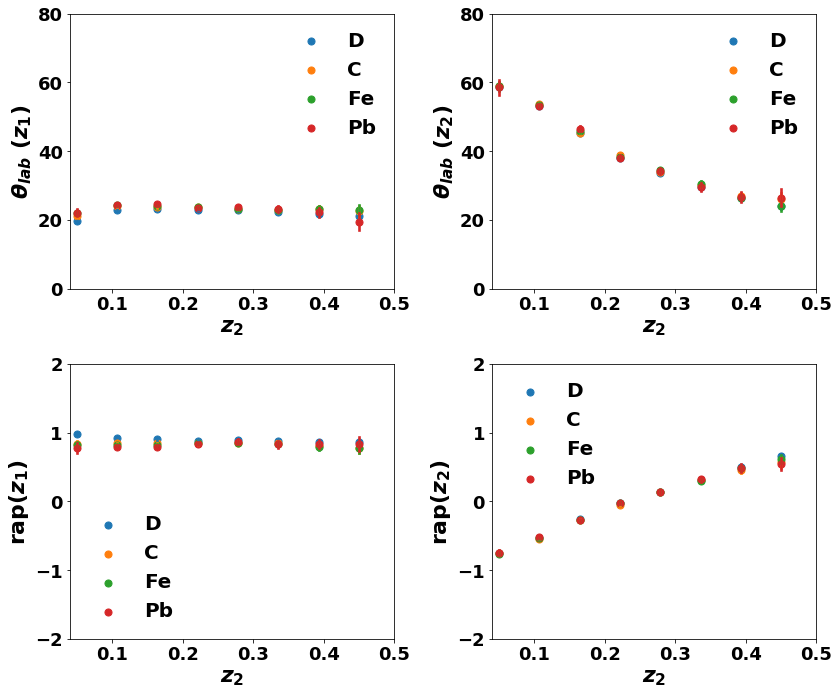

In [11]:
fig = plt.figure(figsize=(12,10))
labelsy=[r'$\theta_{lab}$ ($z_{1}$)', r'$\theta_{lab}$ ($z_{2}$)' ,'rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_th','h2_th','h1_rap','h2_rap']):  
    plt.subplot(2,2,ivar+1)
    query = queryAllPairs+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')     
    if ivar==0:    
        plt.gca().set_ylim(top=80)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=80.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==3:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)    

plt.tight_layout()
plt.savefig('ProfilePlots_z2_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_3.pdf', bbox_inches='tight')     

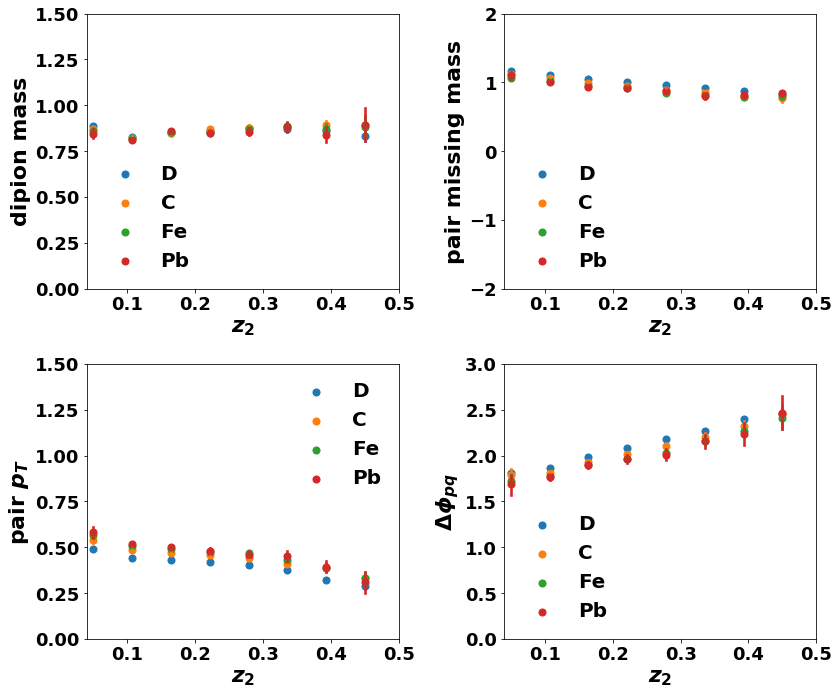

In [12]:
fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$\Delta \phi_{pq}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2x','pair_pt','dphi']):   
    plt.subplot(2,2,ivar+1) 
    query = queryAllPairs+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')   
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=0)      


plt.tight_layout()
plt.savefig('ProfilePlots_z2_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_4.pdf', bbox_inches='tight')     

**With respect to $\Delta \phi$ (Data, All pairs)**

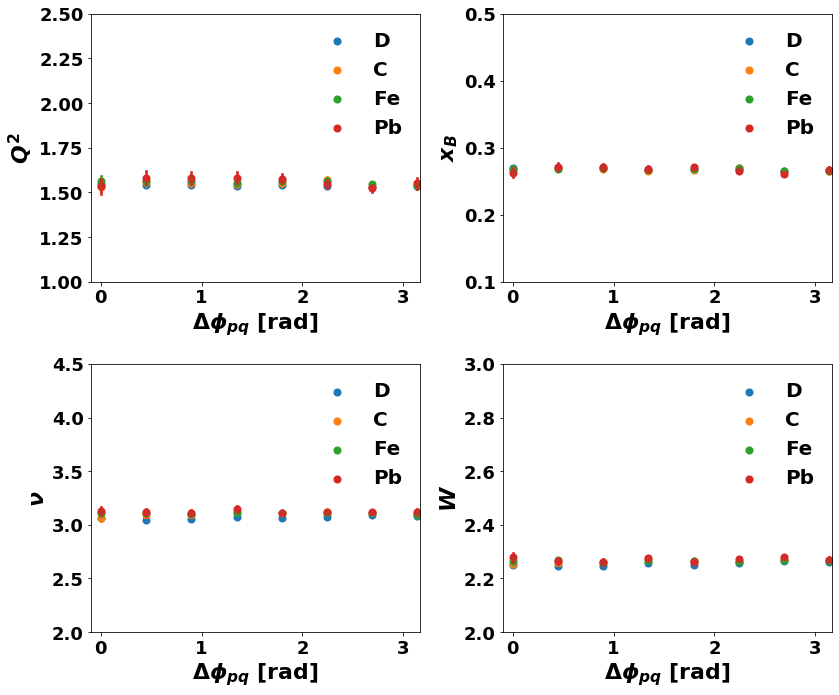

In [13]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPairs + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_1.pdf', bbox_inches='tight')
plt.show()

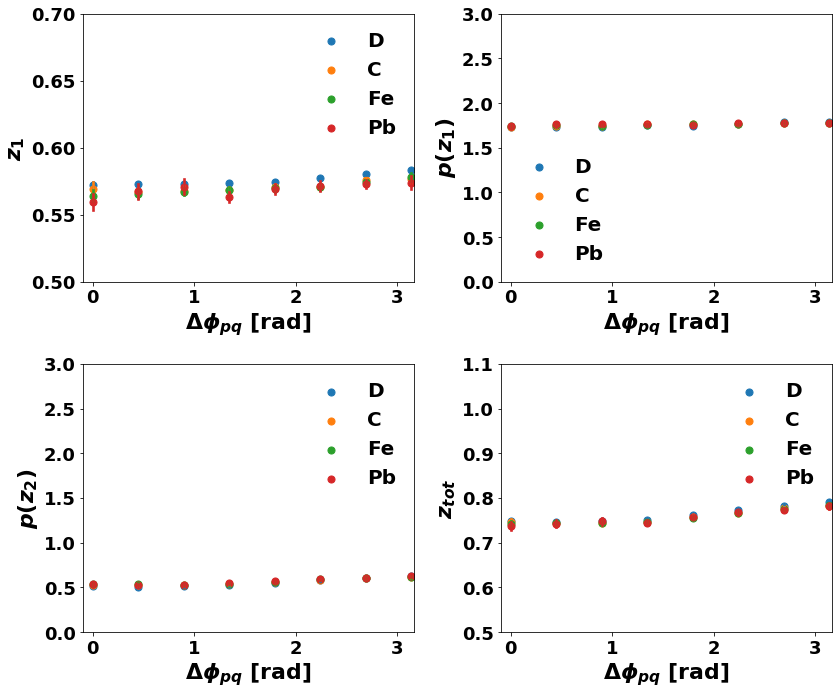

In [14]:
fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPairs + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])  
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_2.pdf', bbox_inches='tight')
plt.show()


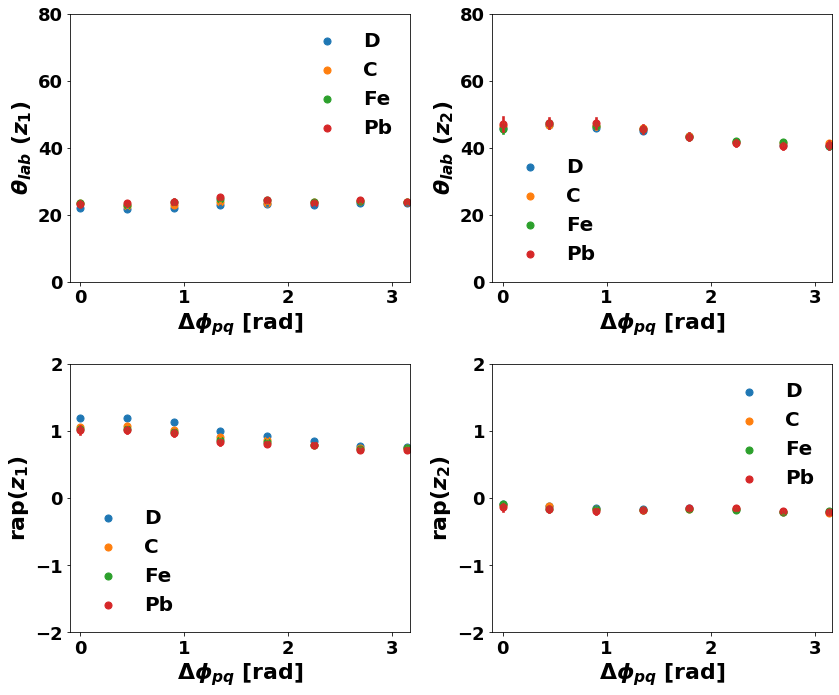

In [15]:
fig = plt.figure(figsize=(12,10))
labelsy=[r'$\theta_{lab}$ ($z_{1}$)', r'$\theta_{lab}$ ($z_{2}$)','rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_th','h2_th','h1_rap','h2_rap']):  
    plt.subplot(2,2,ivar+1)          
    query = queryAllPairs + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=80)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=80.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==3:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_3.pdf', bbox_inches='tight')  

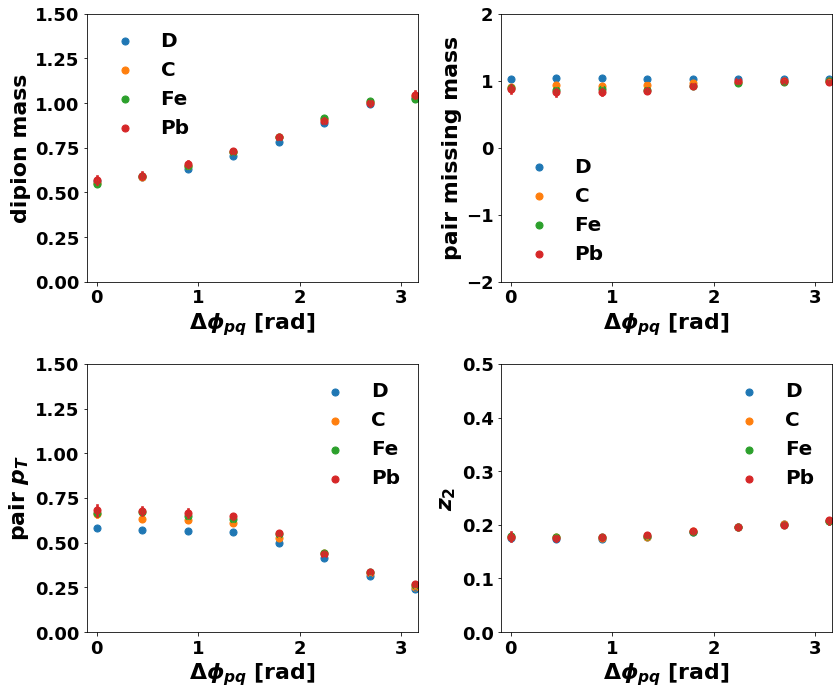

In [16]:
fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2x','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllPairs + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])       
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_4.pdf', bbox_inches='tight') 

**As a function of the dipion Inv mass (Data All pairs)**

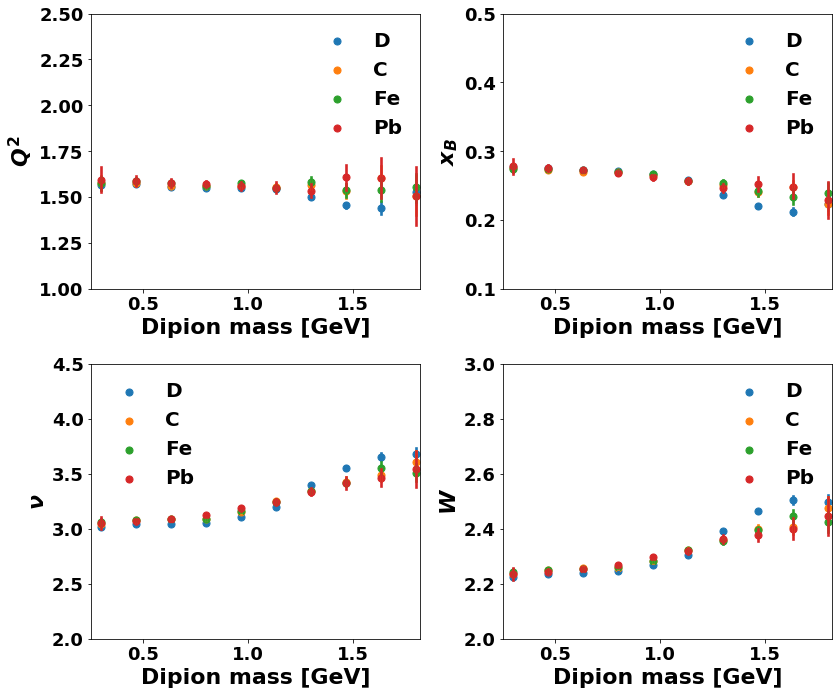

In [17]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPairs
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])  
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)

plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_1.pdf', bbox_inches='tight')
plt.show()

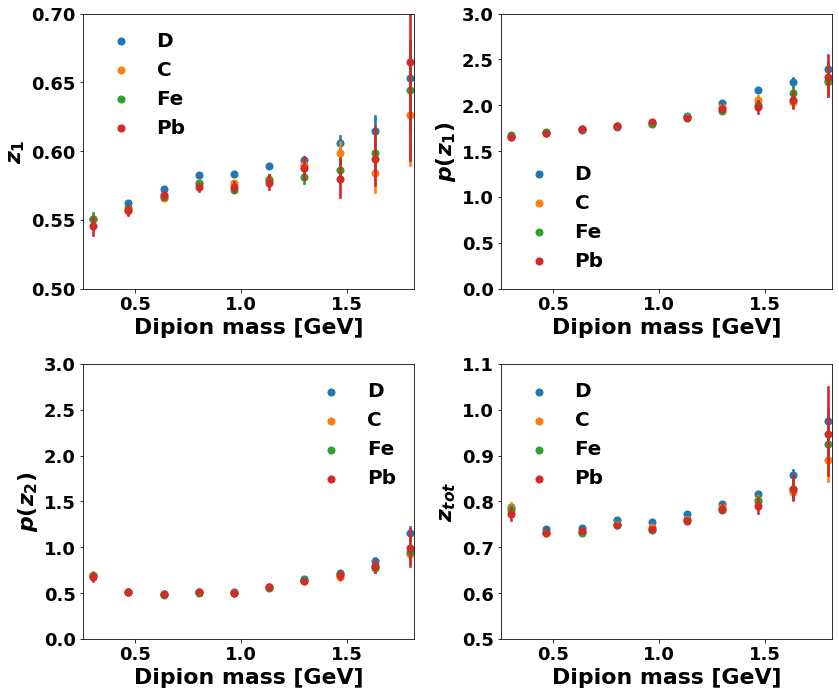

In [18]:
fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPairs
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])   
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_2.pdf', bbox_inches='tight')
plt.show()


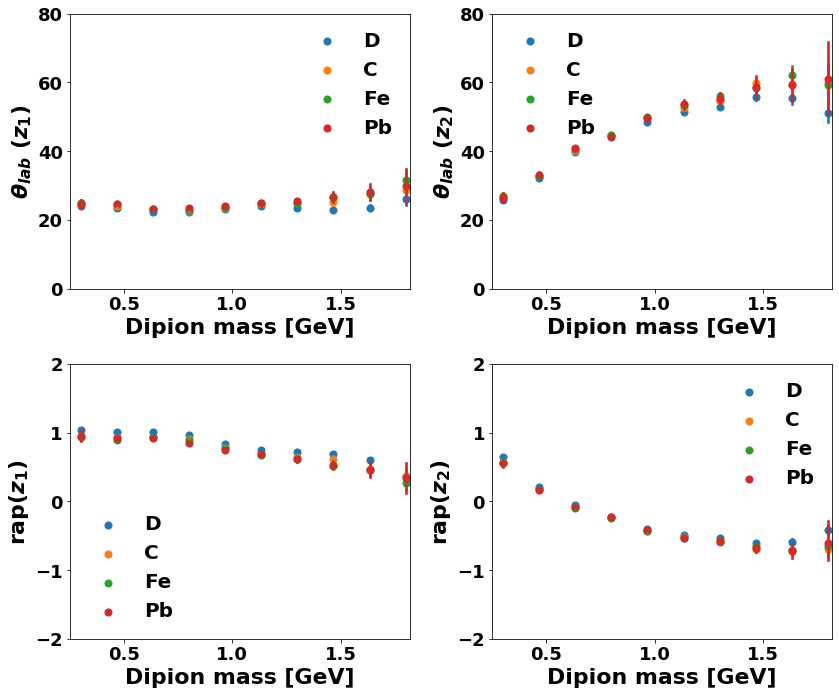

In [19]:
fig = plt.figure(figsize=(12,10))
labelsy=[r'$\theta_{lab}$ ($z_{1}$)', r'$\theta_{lab}$ ($z_{2}$)','rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_th','h2_th','h1_rap','h2_rap']):  
    plt.subplot(2,2,ivar+1)                   
    query = queryAllPairs
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])
    if ivar==0:    
        plt.gca().set_ylim(top=80)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=80.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==3:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  
    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_3.pdf', bbox_inches='tight')  

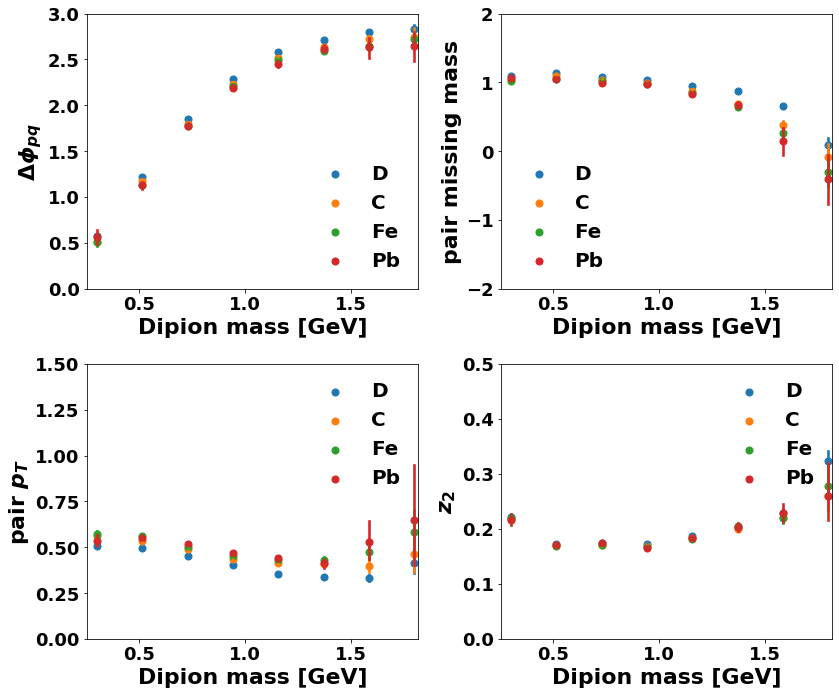

In [20]:
fig = plt.figure(figsize=(12,10))
labelsy=[r'$\Delta \phi_{pq}$','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['dphi','mx_eh1h2x','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllPairs
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,8),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82]) 
    if ivar==0:    
        plt.gca().set_ylim(top=3)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)      
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_4.pdf', bbox_inches='tight') 

In [21]:
print(df['C'].keys())

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe',
       'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_Chi2CC',
       'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'evnt', 'inelasticity', 'h1_e',
       'h1_p', 'z_tot', 'h2_e', 'h2_p', 'pair_pt2', 'h_z'],
      dtype='object')


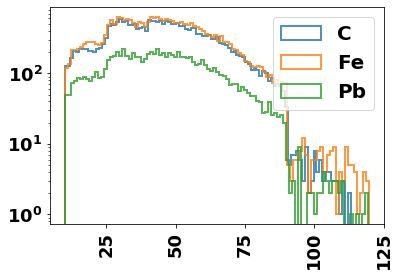

In [22]:
extra_cut = ' and ( (h2_pid==211) or (h2_pid==-211 and h2_th>25 and h2_th<90) or (h2_pid==-211 and h2_th<40 and h2_th>25 and h2_p>0.5))'

for i,target in enumerate(['C','Fe','Pb']):
    
    y, x, _ = plt.hist(df[target].query('Q2>1 '+pair_cut_nom+extra_cut)['h2_th'],alpha=0.8,lw=2,
                       bins=100,histtype='step',  label=target, density=False)

#plt.xlim(10,30)  
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.legend()    
plt.show()

# Only $\pi^{+}$ (data)

**As a function of $z_{2}$  (data $\pi^{+}$ only)**

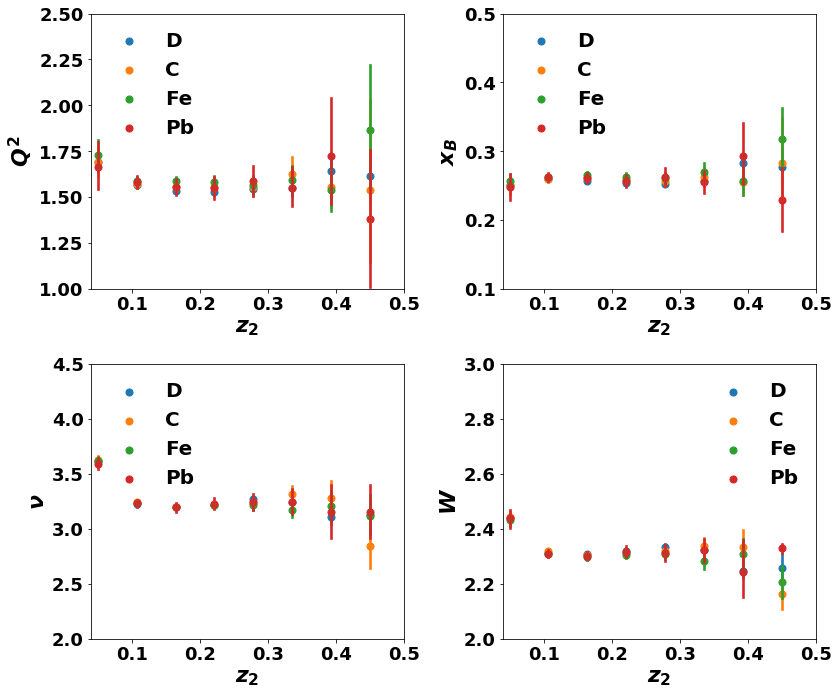

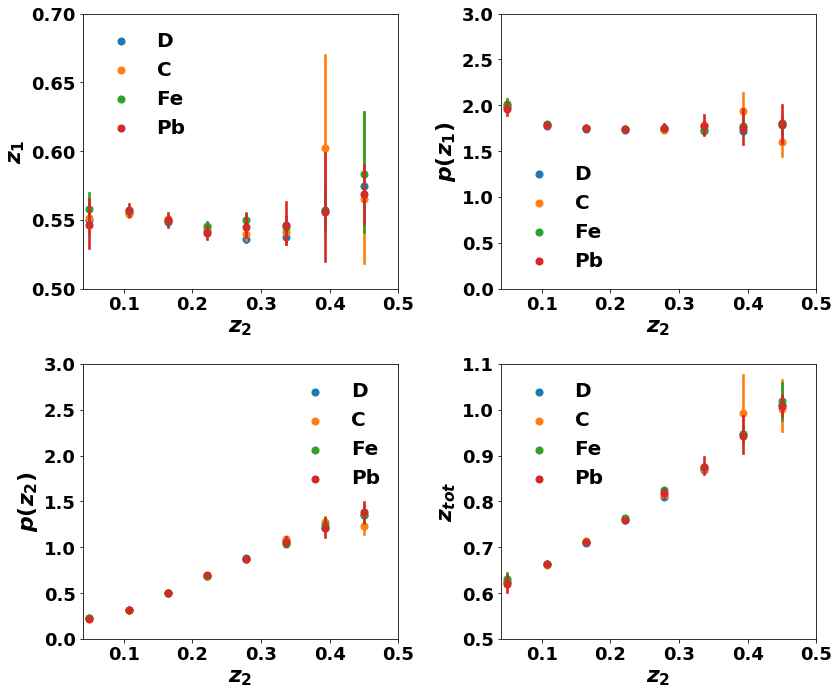

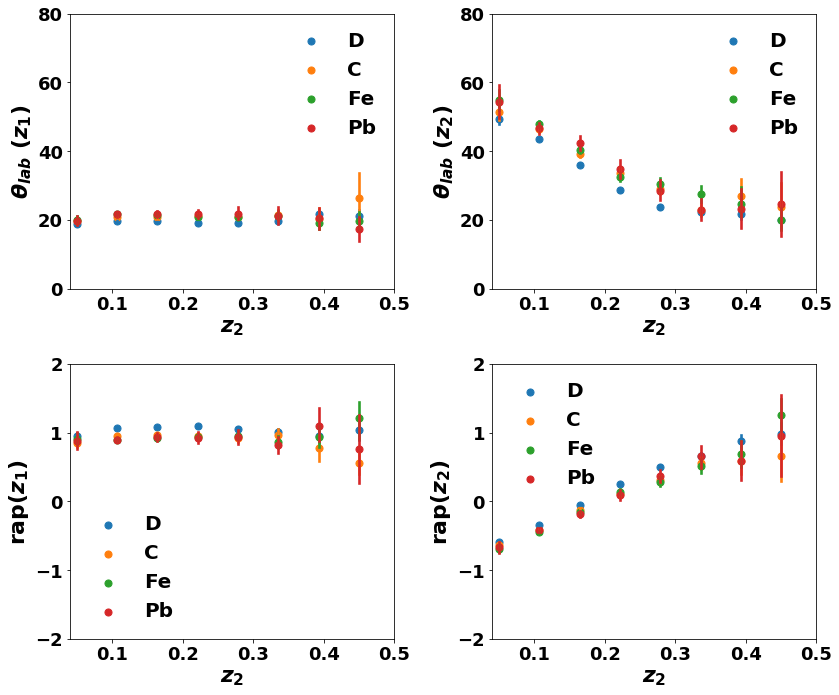

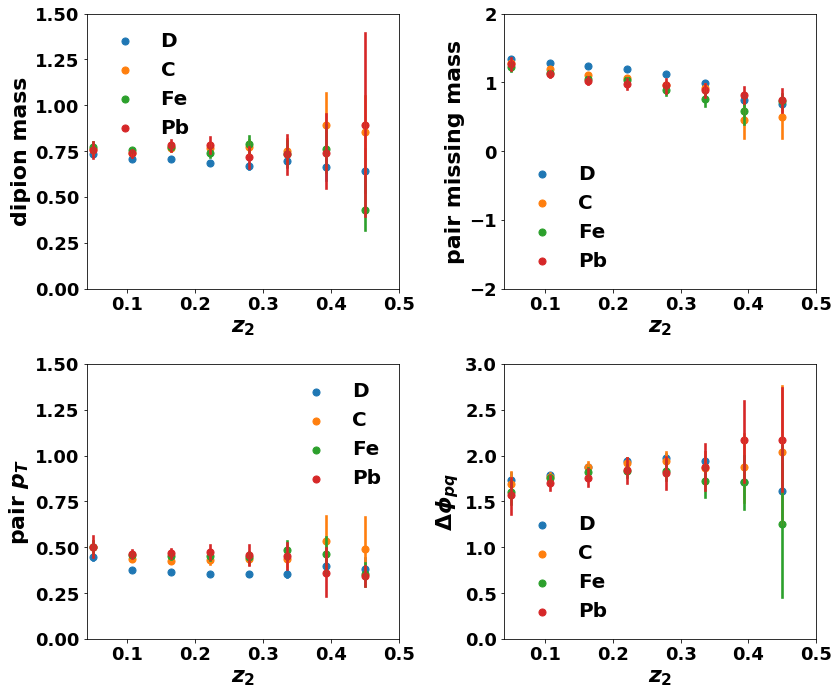

In [23]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPosPions +' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.04,0.5])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_posPions_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_posPions_1.pdf', bbox_inches='tight')
plt.show()



fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPosPions+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)

    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')    
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_posPions_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_posPions_2.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,10))
labelsy=[r'$\theta_{lab}$ ($z_{1}$)', r'$\theta_{lab}$ ($z_{2}$)' ,'rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_th','h2_th','h1_rap','h2_rap']):  
    plt.subplot(2,2,ivar+1)
    query = queryAllPosPions+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')     
    if ivar==0:    
        plt.gca().set_ylim(top=80)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=80.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==3:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)    

plt.tight_layout()
plt.savefig('ProfilePlots_z2_posPions_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_posPions_3.pdf', bbox_inches='tight')  



fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$\Delta \phi_{pq}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2x','pair_pt','dphi']):   
    plt.subplot(2,2,ivar+1) 
    query = queryAllPosPions+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')   
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=0)      


plt.tight_layout()
plt.savefig('ProfilePlots_z2_posPions_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_posPions_4.pdf', bbox_inches='tight')  



**As a function of $\Delta \phi$ (data $\pi^{+}$ only)**

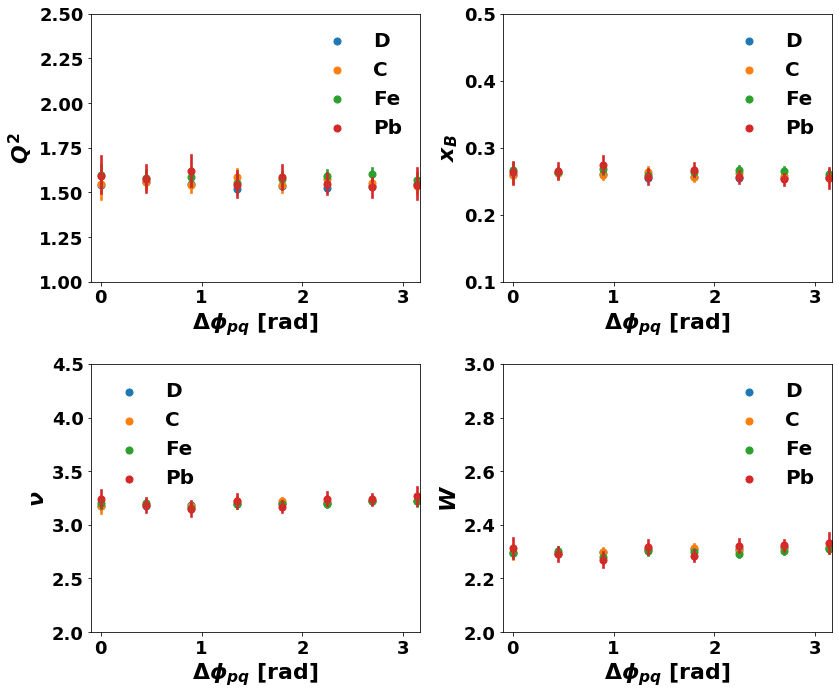

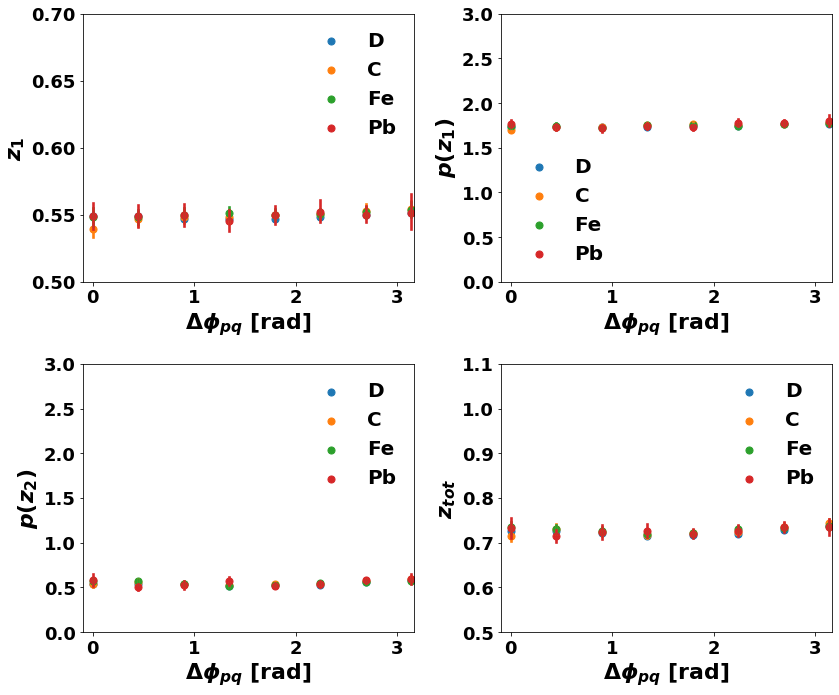

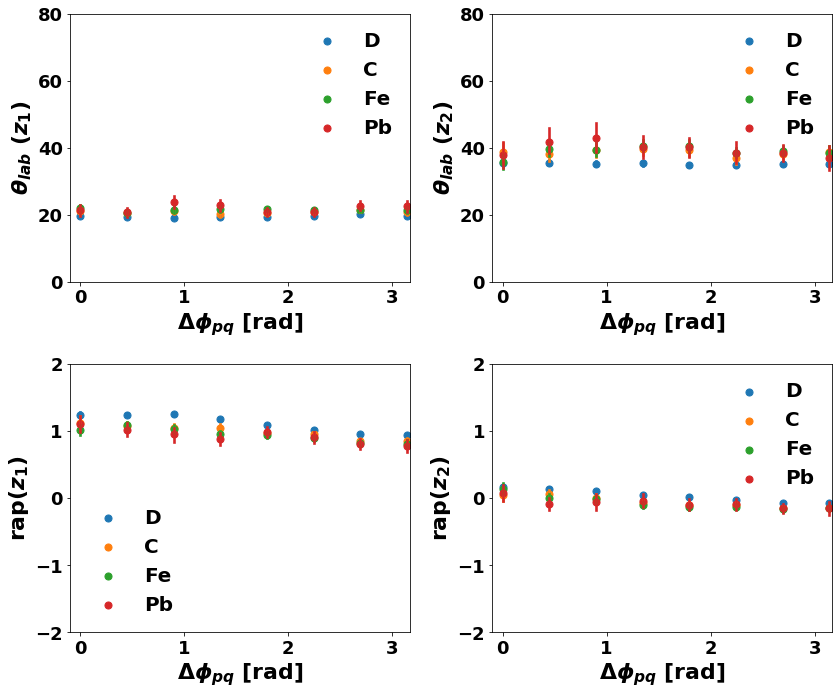

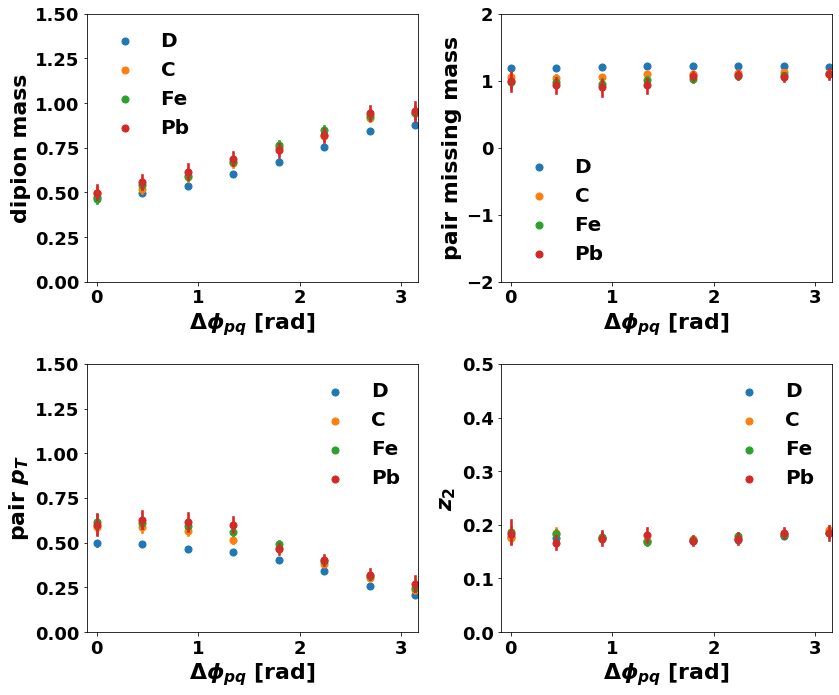

In [24]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPosPions + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_posPions_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_posPions_1.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPosPions + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])  
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_posPions_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_posPions_2.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,10))
labelsy=[r'$\theta_{lab}$ ($z_{1}$)', r'$\theta_{lab}$ ($z_{2}$)','rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_th','h2_th','h1_rap','h2_rap']):  
    plt.subplot(2,2,ivar+1)          
    query = queryAllPosPions + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=80)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=80.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==3:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_posPions_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_posPions_3.pdf', bbox_inches='tight')  



fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2x','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllPosPions + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])       
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_posPions_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_posPions_4.pdf', bbox_inches='tight') 



**As a function of dipion Inv Mass (data $\pi^{+}$ only)**

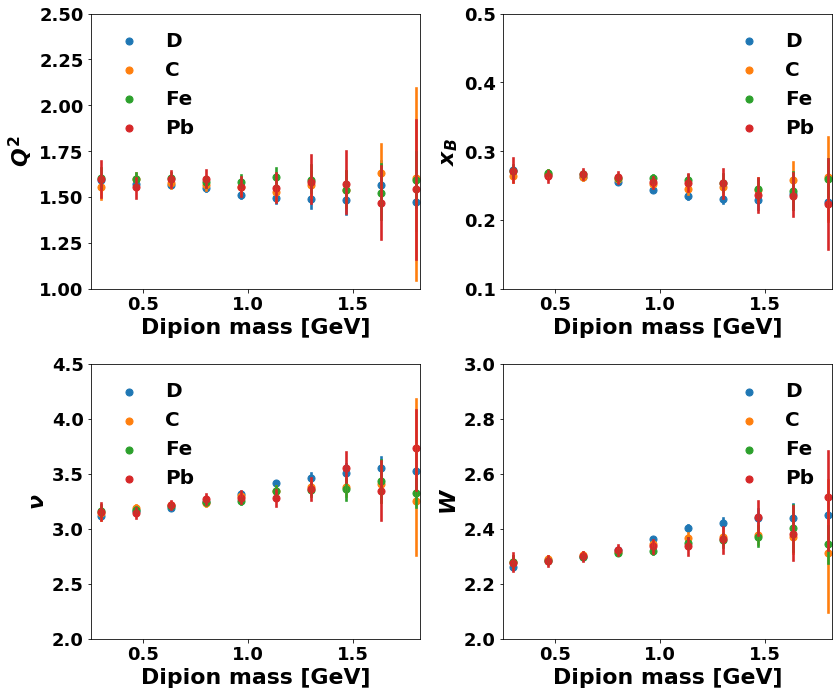

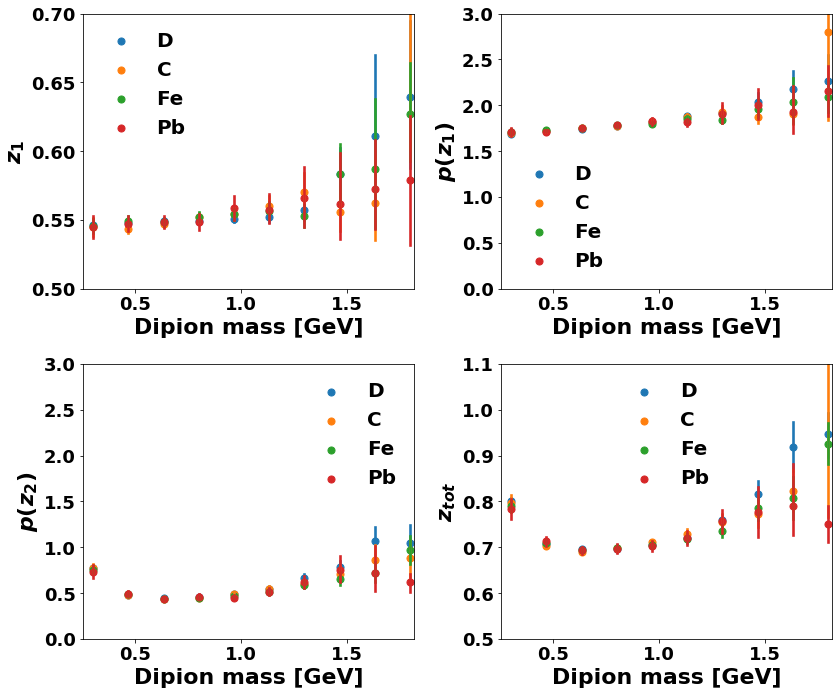

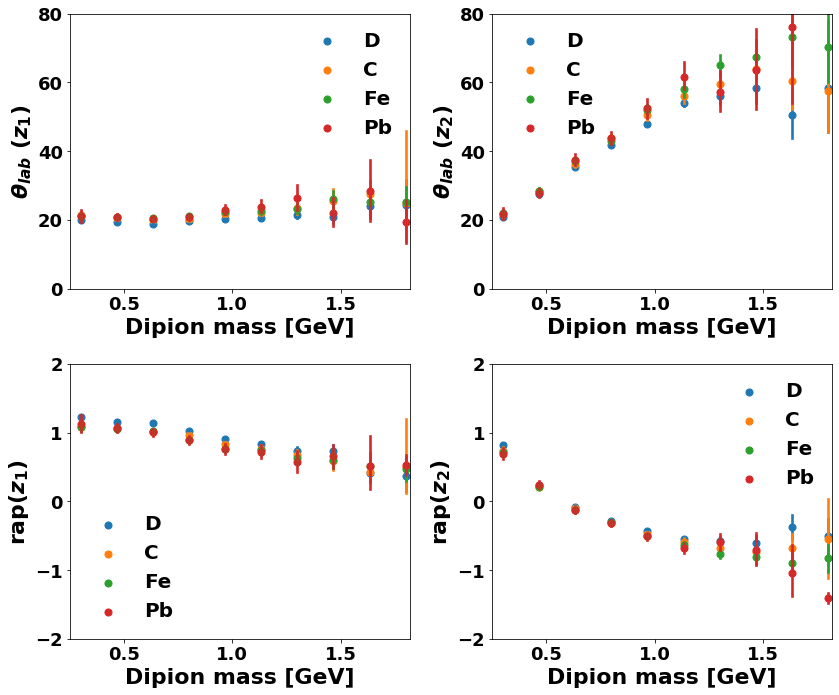

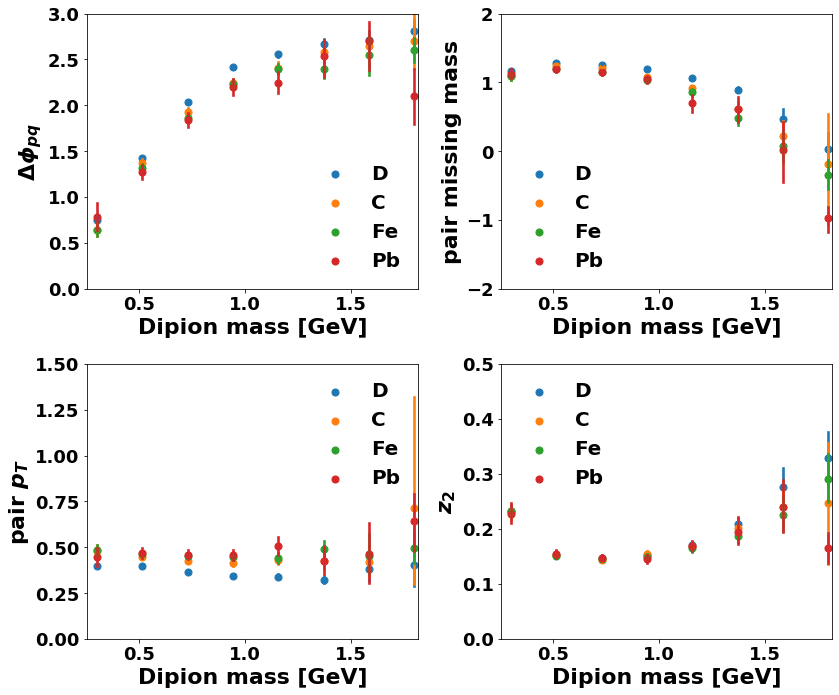

In [25]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPosPions
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])  
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)

plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_posPions_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_posPions_1.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPosPions
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])   
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_posPions_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_posPions_2.pdf', bbox_inches='tight')
plt.show()




fig = plt.figure(figsize=(12,10))
labelsy=[r'$\theta_{lab}$ ($z_{1}$)', r'$\theta_{lab}$ ($z_{2}$)','rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_th','h2_th','h1_rap','h2_rap']):  
    plt.subplot(2,2,ivar+1)                   
    query = queryAllPosPions
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])
    if ivar==0:    
        plt.gca().set_ylim(top=80)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=80.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==3:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  
    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_posPions_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_posPions_3.pdf', bbox_inches='tight')  


fig = plt.figure(figsize=(12,10))
labelsy=[r'$\Delta \phi_{pq}$','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['dphi','mx_eh1h2x','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllPosPions
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,8),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82]) 
    if ivar==0:    
        plt.gca().set_ylim(top=3)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)      
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_posPions_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_posPions_4.pdf', bbox_inches='tight') 

# Only $\pi^{-}$ (data)

**As a function of $z_{2}$ (data $\pi^{-}$ only)**

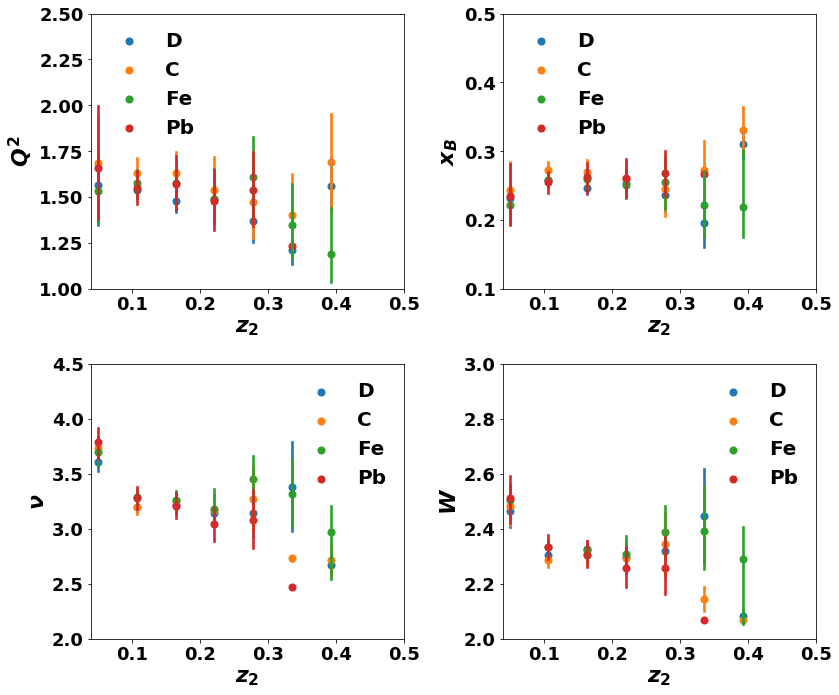

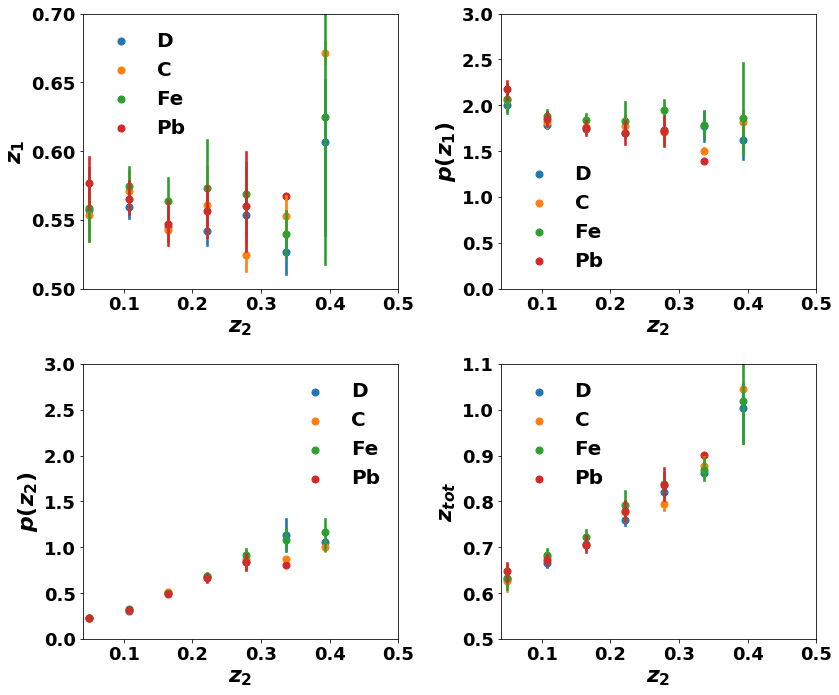

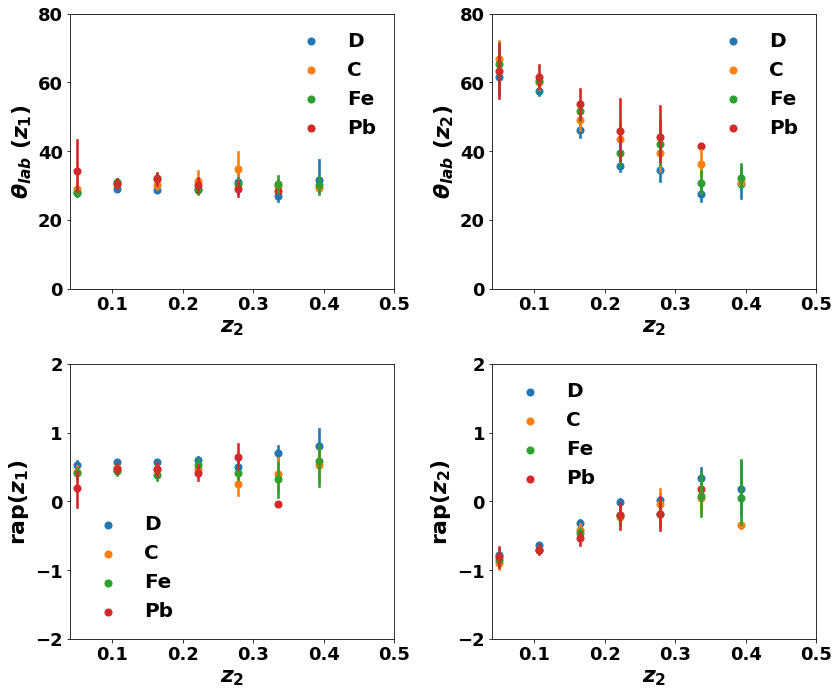

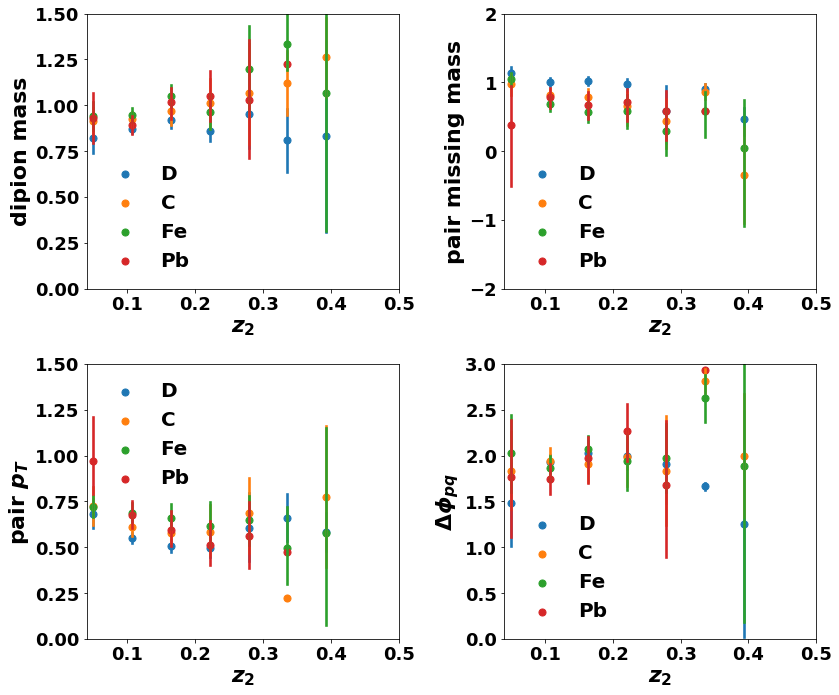

In [26]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllNegPions +' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.04,0.5])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_negPions_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_negPions_1.pdf', bbox_inches='tight')
plt.show()



fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllNegPions+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)

    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')    
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_negPions_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_negPions_2.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,10))
labelsy=[r'$\theta_{lab}$ ($z_{1}$)', r'$\theta_{lab}$ ($z_{2}$)' ,'rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_th','h2_th','h1_rap','h2_rap']):  
    plt.subplot(2,2,ivar+1)
    query = queryAllNegPions+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')     
    if ivar==0:    
        plt.gca().set_ylim(top=80)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=80.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==3:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)    

plt.tight_layout()
plt.savefig('ProfilePlots_z2_negPions_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_negPions_3.pdf', bbox_inches='tight')  



fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$\Delta \phi_{pq}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2x','pair_pt','dphi']):   
    plt.subplot(2,2,ivar+1) 
    query = queryAllNegPions+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['h2_z'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')   
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=0)      


plt.tight_layout()
plt.savefig('ProfilePlots_z2_negPions_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_negPions_4.pdf', bbox_inches='tight')  



**As a function of $\Delta \phi$  (data $\pi^{-}$ only)**

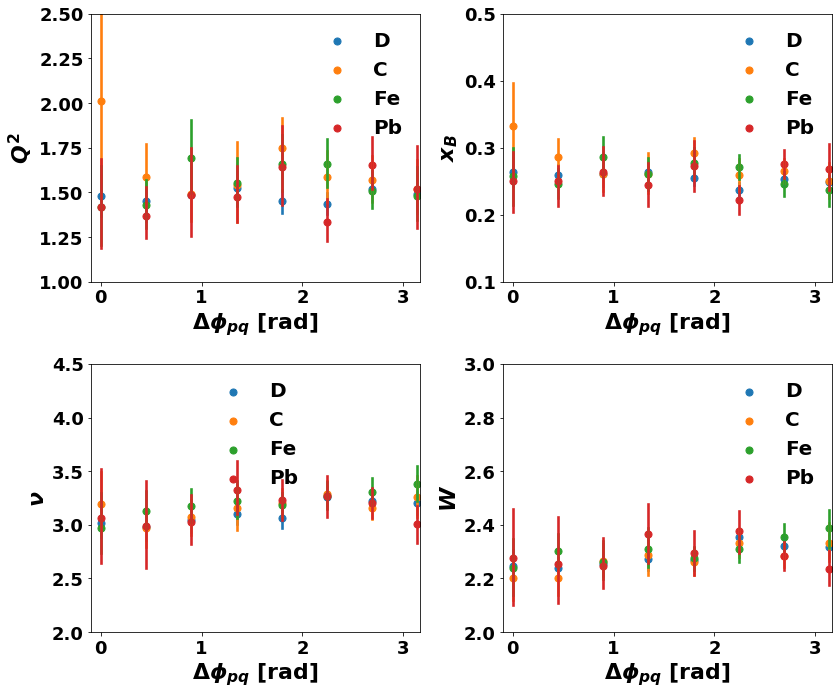

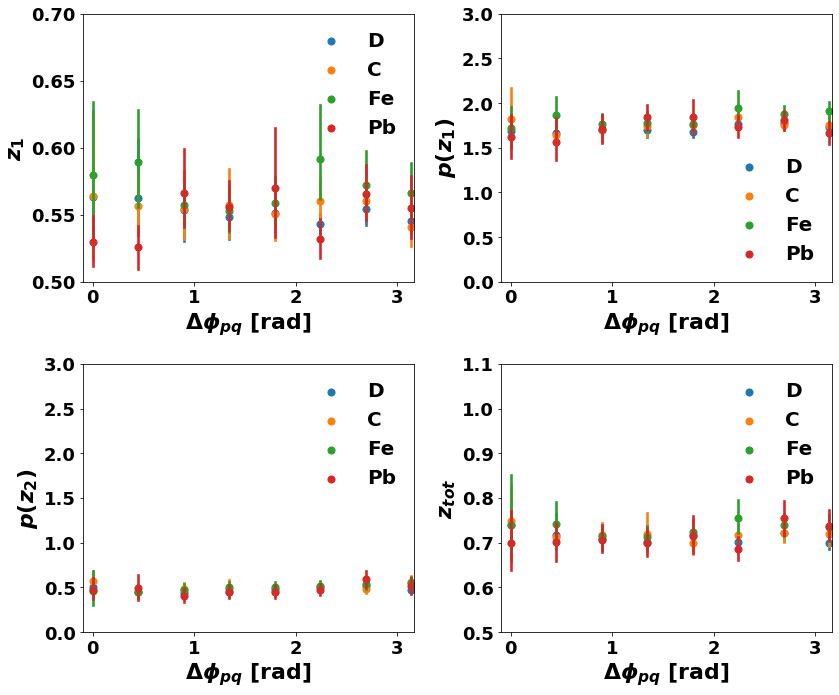

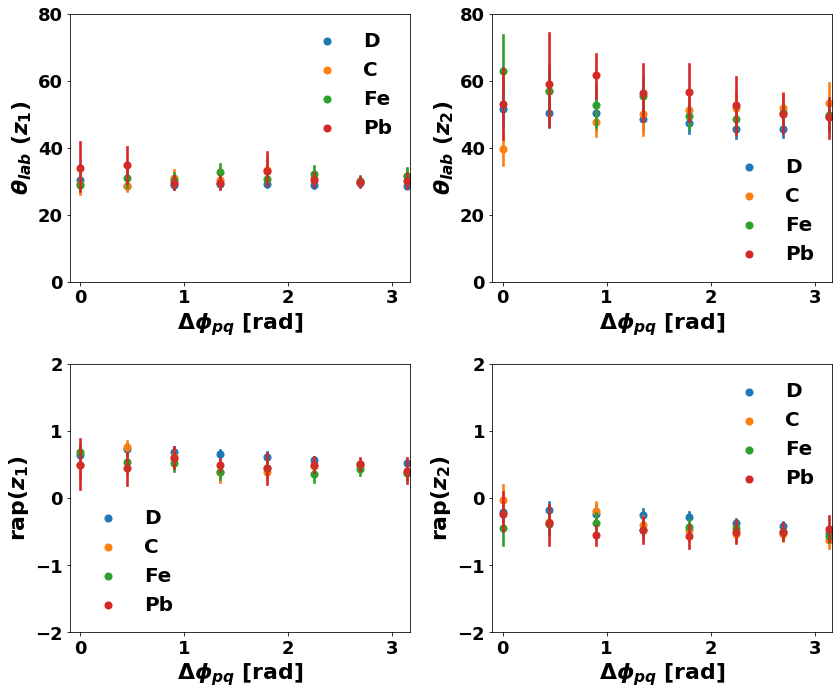

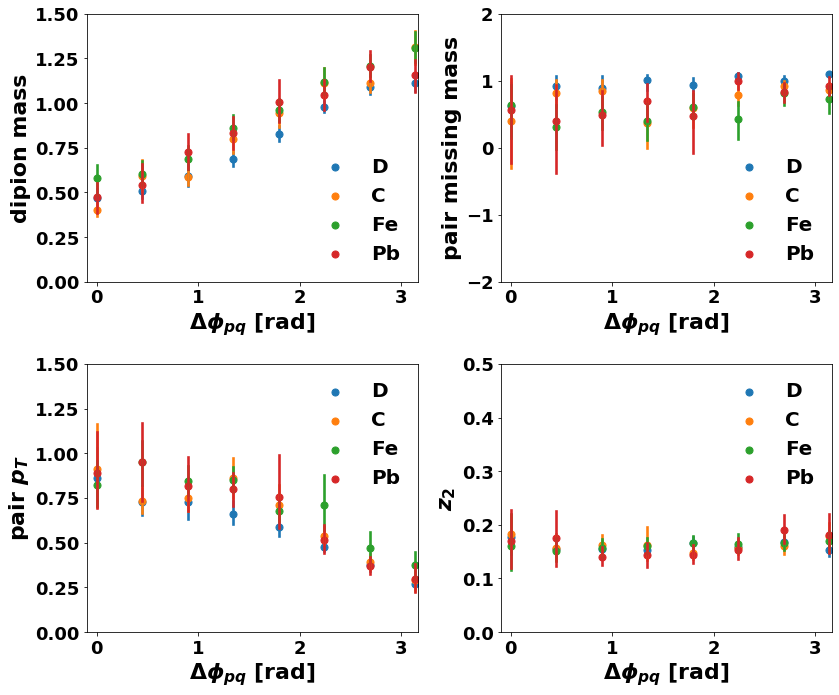

In [27]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllNegPions + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_negPions_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_negPions_1.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllNegPions + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])  
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_negPions_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_negPions_2.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,10))
labelsy=[r'$\theta_{lab}$ ($z_{1}$)', r'$\theta_{lab}$ ($z_{2}$)','rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_th','h2_th','h1_rap','h2_rap']):  
    plt.subplot(2,2,ivar+1)          
    query = queryAllNegPions + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=80)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=80.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==3:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_negPions_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_negPions_3.pdf', bbox_inches='tight')  



fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2x','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllNegPions + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['dphi'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label=target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])       
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_negPions_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_negPions_4.pdf', bbox_inches='tight') 



**As a function of dipion Inv Mass (data $\pi^{-}$ only)**

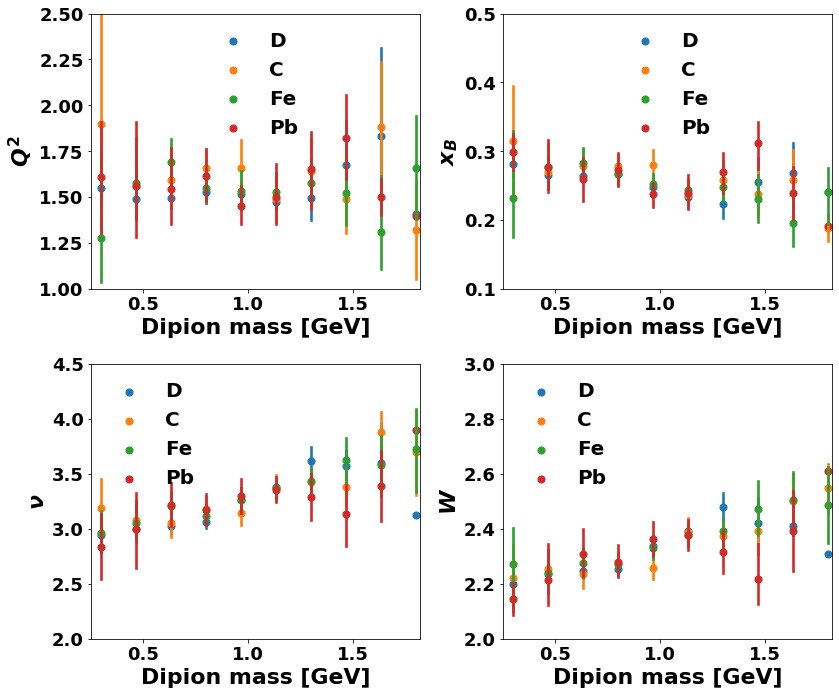

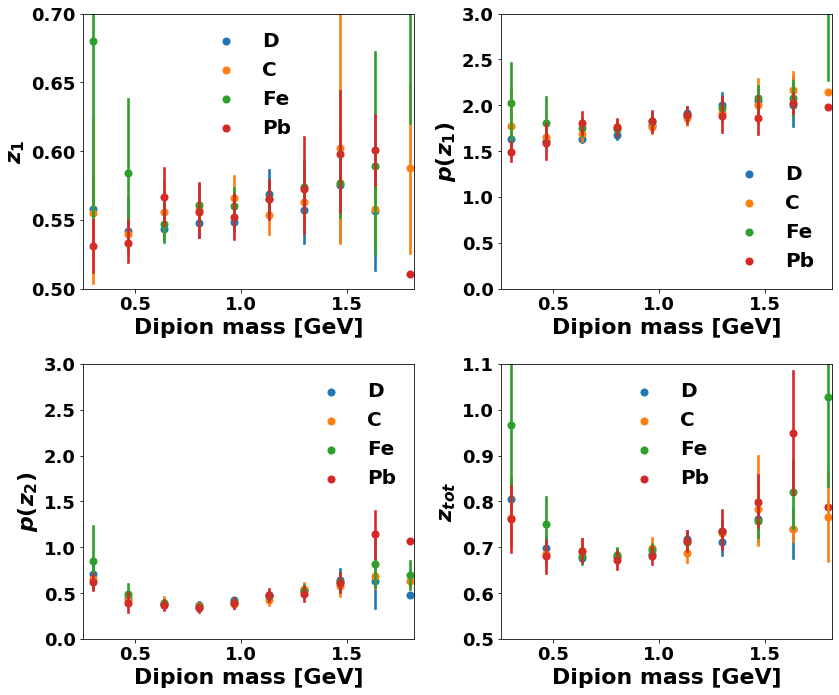

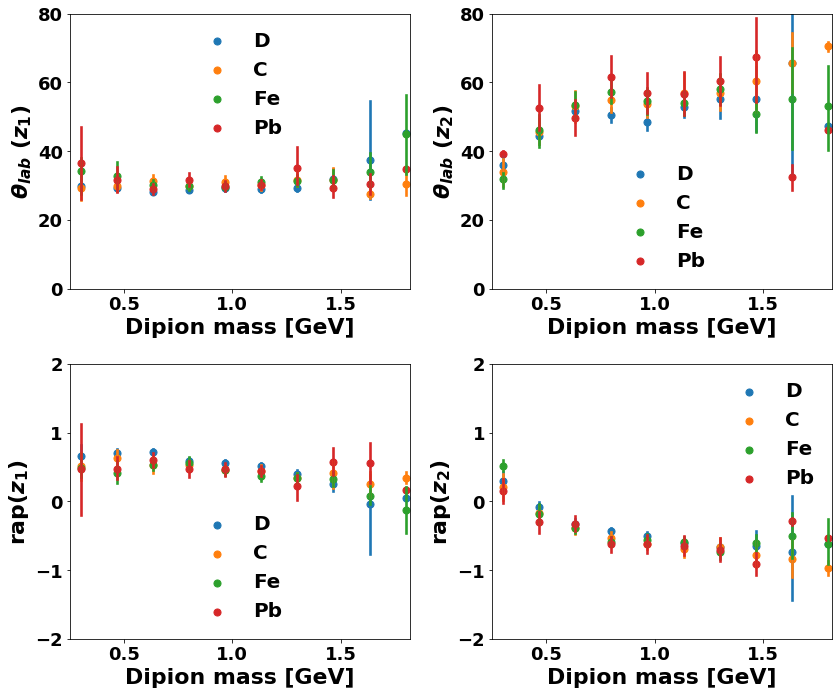

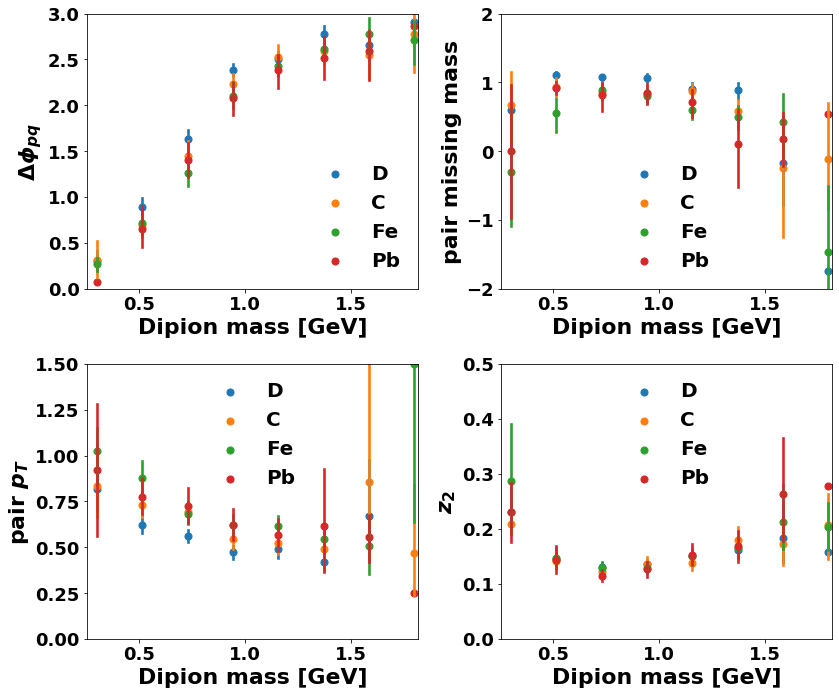

In [28]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllNegPions
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])  
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)

plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_negPions_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_negPions_1.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllNegPions
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])   
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_negPions_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_negPions_2.pdf', bbox_inches='tight')
plt.show()




fig = plt.figure(figsize=(12,10))
labelsy=[r'$\theta_{lab}$ ($z_{1}$)', r'$\theta_{lab}$ ($z_{2}$)','rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_th','h2_th','h1_rap','h2_rap']):  
    plt.subplot(2,2,ivar+1)                   
    query = queryAllNegPions
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])
    if ivar==0:    
        plt.gca().set_ylim(top=80)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=80.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==3:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  
    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_negPions_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_negPions_3.pdf', bbox_inches='tight')  


fig = plt.figure(figsize=(12,10))
labelsy=[r'$\Delta \phi_{pq}$','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['dphi','mx_eh1h2x','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllNegPions
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df[target].query(query)['pair_mass'],y=df[target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,8),fit_reg=None,label=target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82]) 
    if ivar==0:    
        plt.gca().set_ylim(top=3)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)      
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_negPions_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_negPions_4.pdf', bbox_inches='tight') 

# <span style="color:red">Using GiBUU</span>

# All pairs (GiBUU)

**As a function of $z_{2}$ (GiBUU All pairs)**

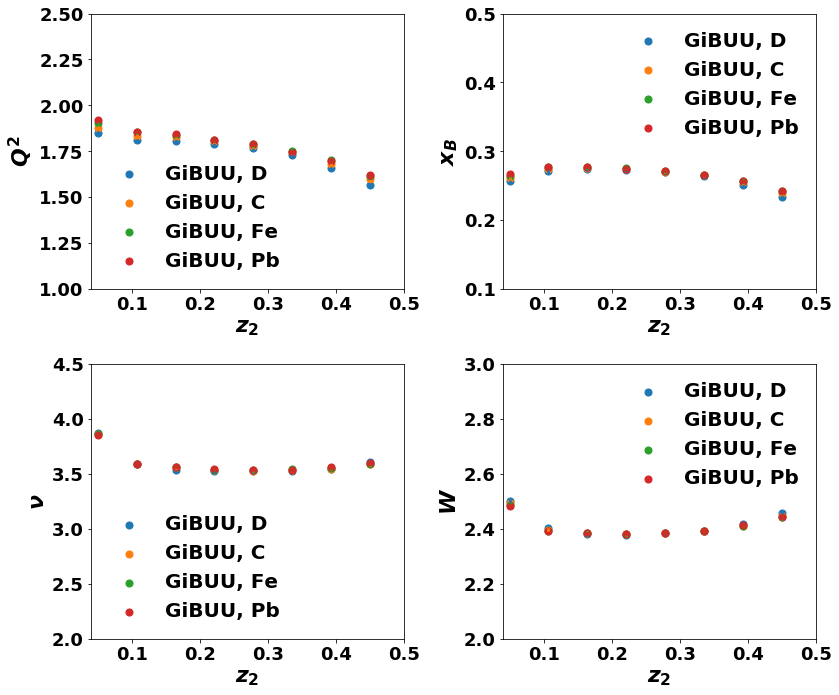

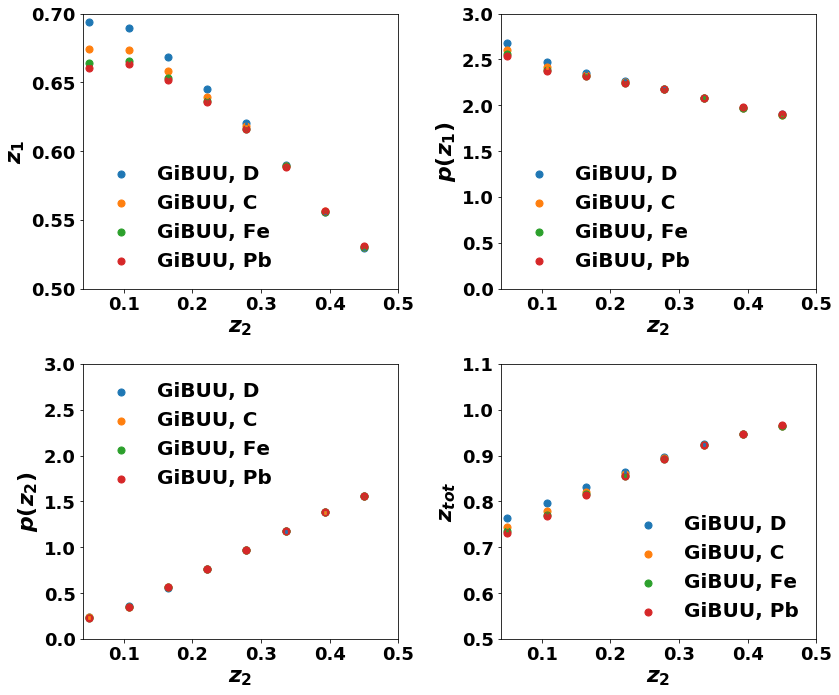

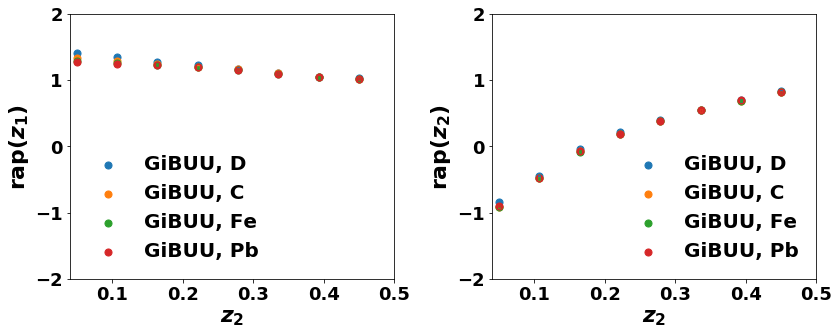

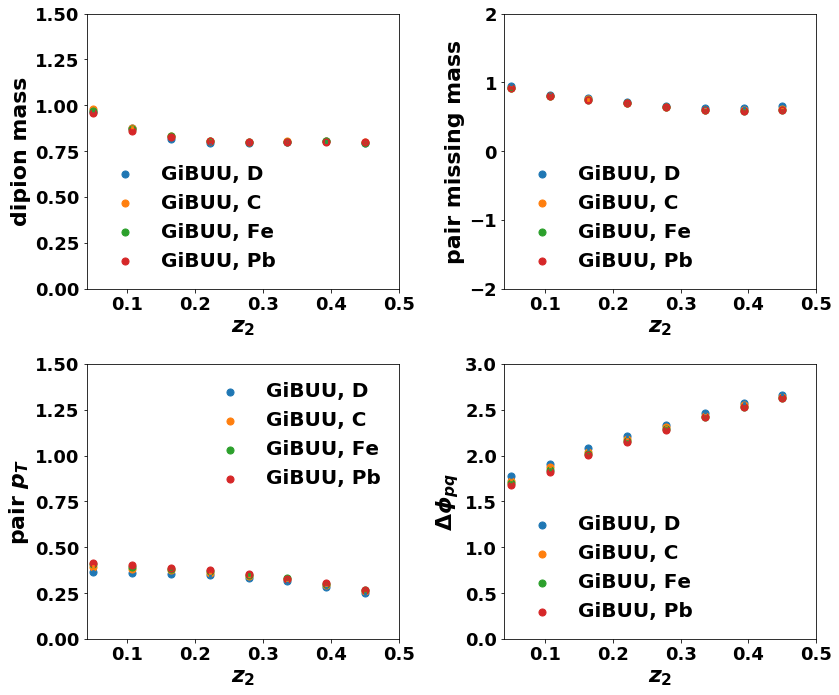

In [29]:

fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPairs_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.04,0.5])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_1_GiBUU.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_1_GiBUU.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPairs_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)

    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')    
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_2_GiBUU.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_2_GiBUU.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,5))
labelsy=['rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_rap','h2_rap']):  
    plt.subplot(1,2,ivar+1)
    query = queryAllPairs_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')     

    if ivar==0:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==1:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)    

plt.tight_layout()
plt.savefig('ProfilePlots_z2_3_GiBUU.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_3_GiBUU.pdf', bbox_inches='tight')     


fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$\Delta \phi_{pq}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2','pair_pt','dphi']):   
    plt.subplot(2,2,ivar+1) 
    query = queryAllPairs_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')   
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=0)      

plt.tight_layout()
plt.savefig('ProfilePlots_z2_4_GiBUU.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_4_GiBUU.pdf', bbox_inches='tight')     



**As a function of $\Delta \phi$  (GiBUU All pairs)**

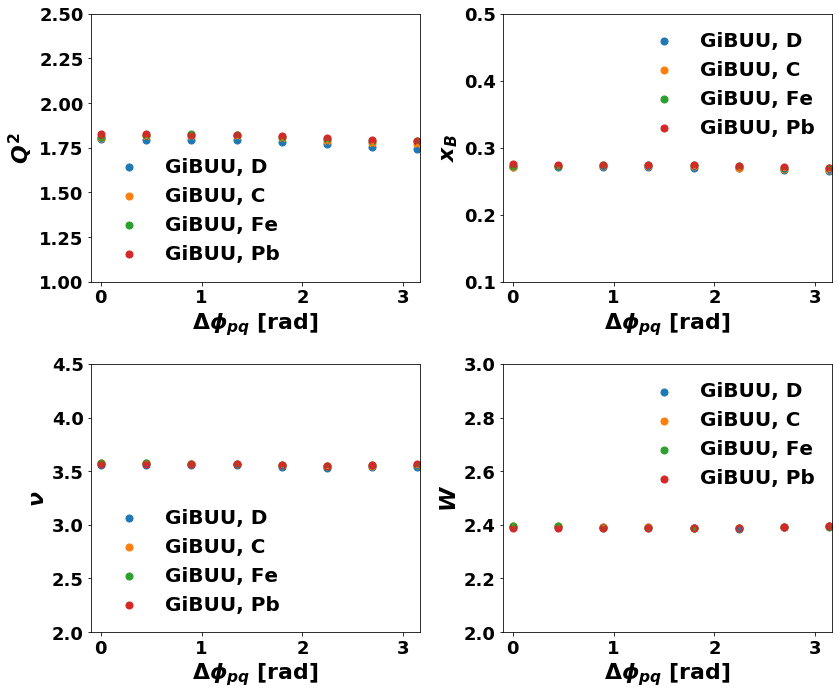

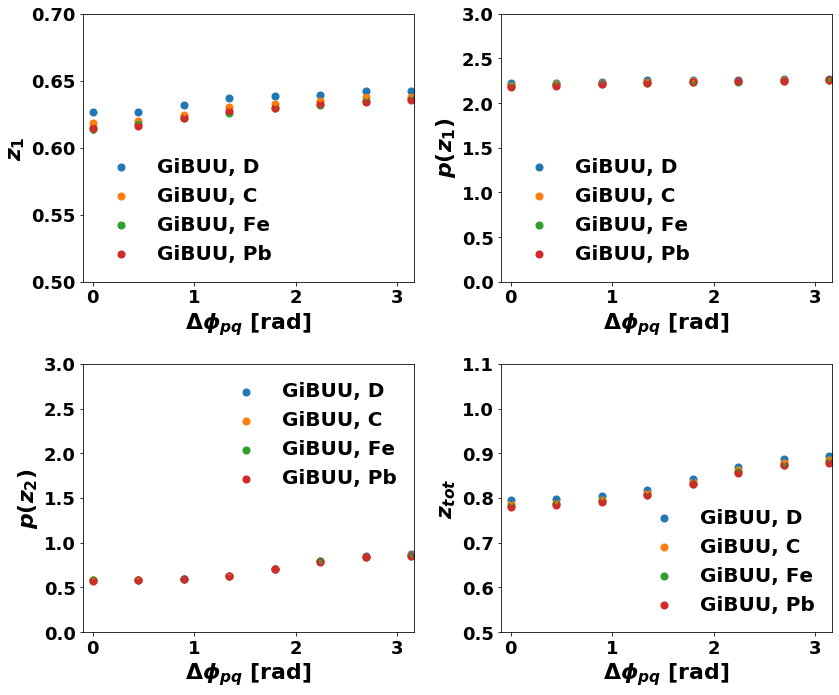

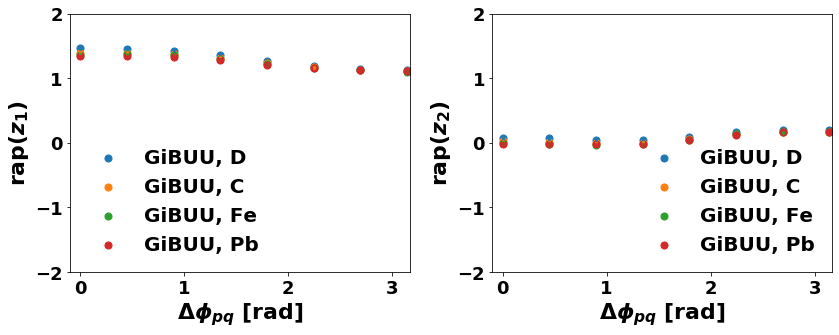

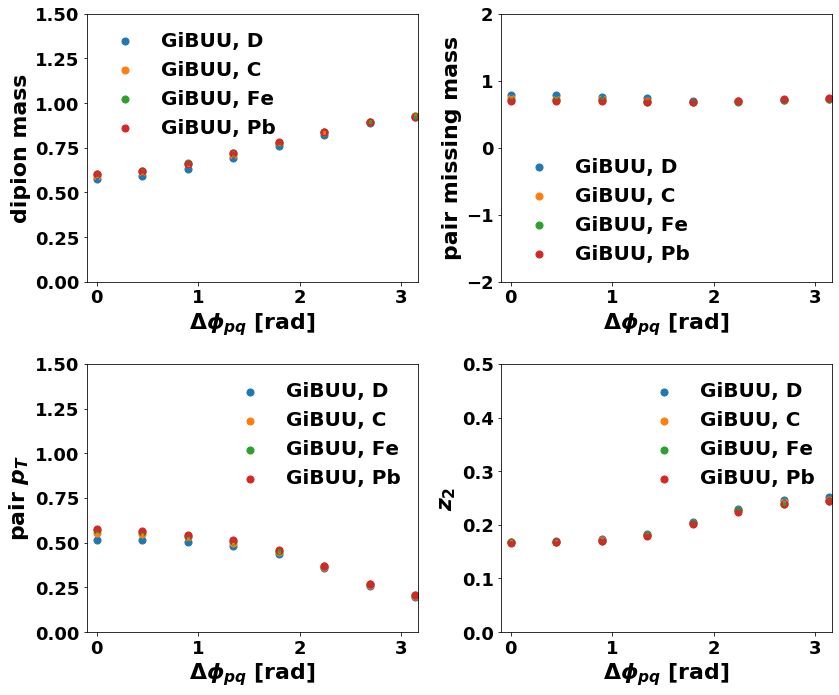

In [30]:

fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPairs_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_GiBUU_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_GiBUU_1.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPairs_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])  
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_GiBUU_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_GiBUU_2.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,5))
labelsy=['rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_rap','h2_rap']):  
    plt.subplot(1,2,ivar+1)          
    query = queryAllPairs_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==1:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_GiBUU_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_GiBUU_3.pdf', bbox_inches='tight')  

fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllPairs_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])       
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_GiBUU_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_GiBUU_4.pdf', bbox_inches='tight') 


**As a function of dipion Inv Mass (GiBUU All pairs)**

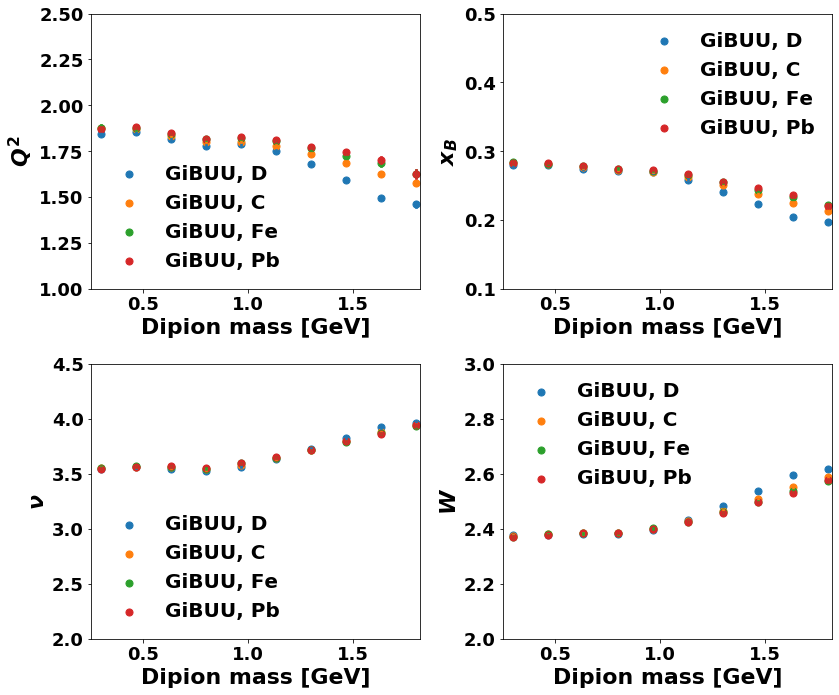

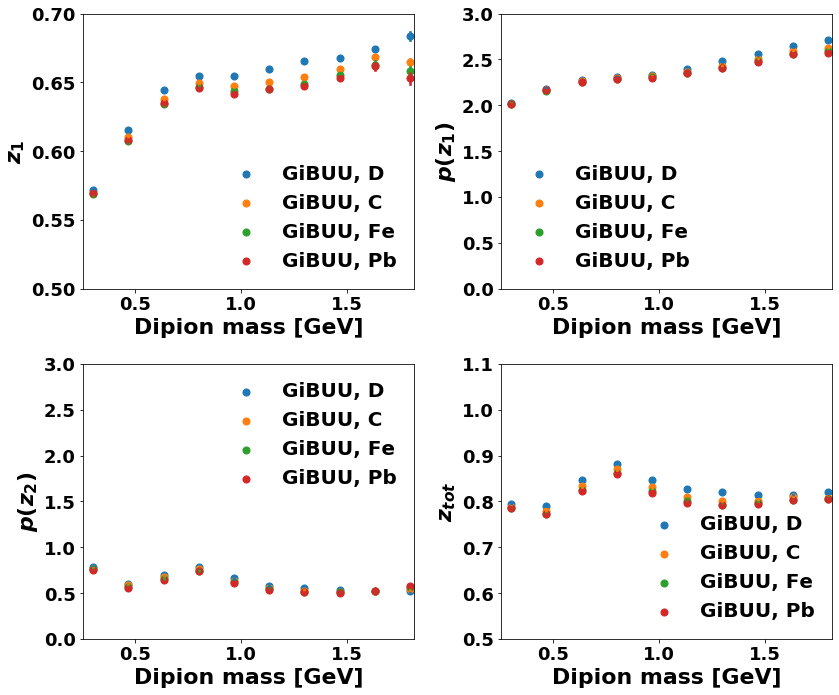

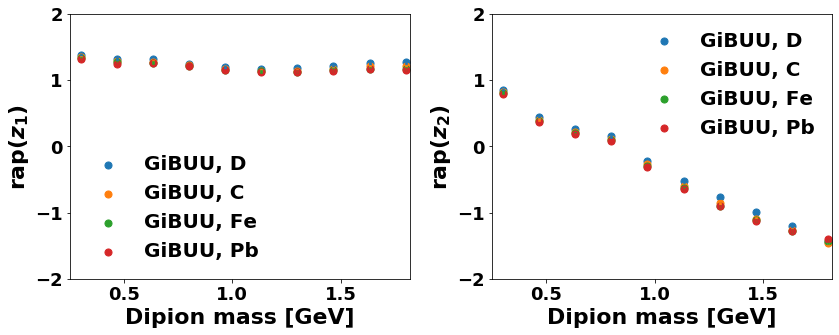

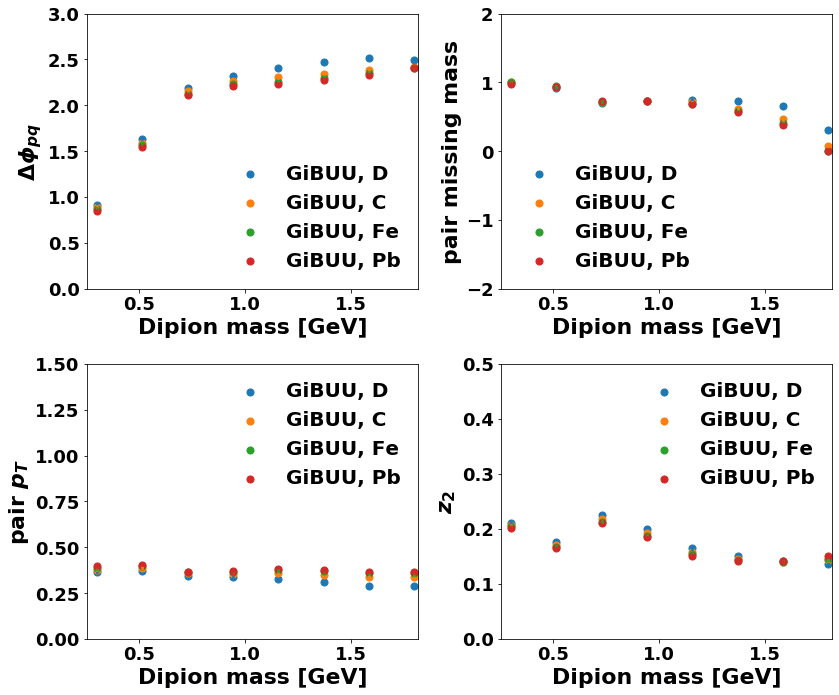

In [31]:

fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPairs_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])  
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)

plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_GiBUU_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_GiBUU_1.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPairs_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])   
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_GiBUU_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_GiBUU_2.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,5))
labelsy=['rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_rap','h2_rap']):  
    plt.subplot(1,2,ivar+1)                   
    query = queryAllPairs_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])

    if ivar==0:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==1:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  
    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_GiBUU_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_GiBUU_3.pdf', bbox_inches='tight')  


fig = plt.figure(figsize=(12,10))
labelsy=[r'$\Delta \phi_{pq}$','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['dphi','mx_eh1h2','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllPairs_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,8),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82]) 
    if ivar==0:    
        plt.gca().set_ylim(top=3)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)      
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_GiBUU_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_GiBUU_4.pdf', bbox_inches='tight') 


# Only $\pi^{+}$ (GiBUU)

**As a function of $z_{2}$ (GiBUU $\pi^{+}$ only)**

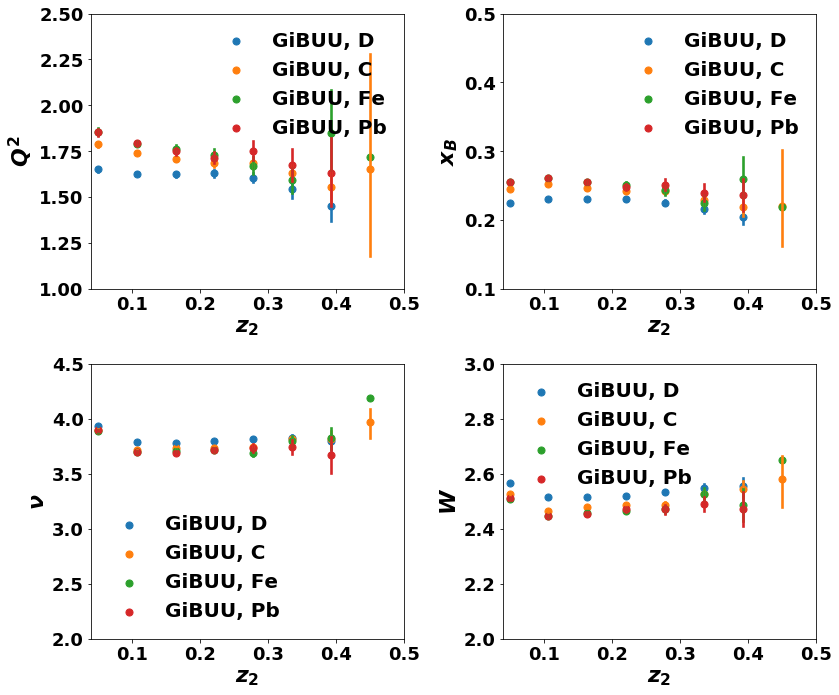

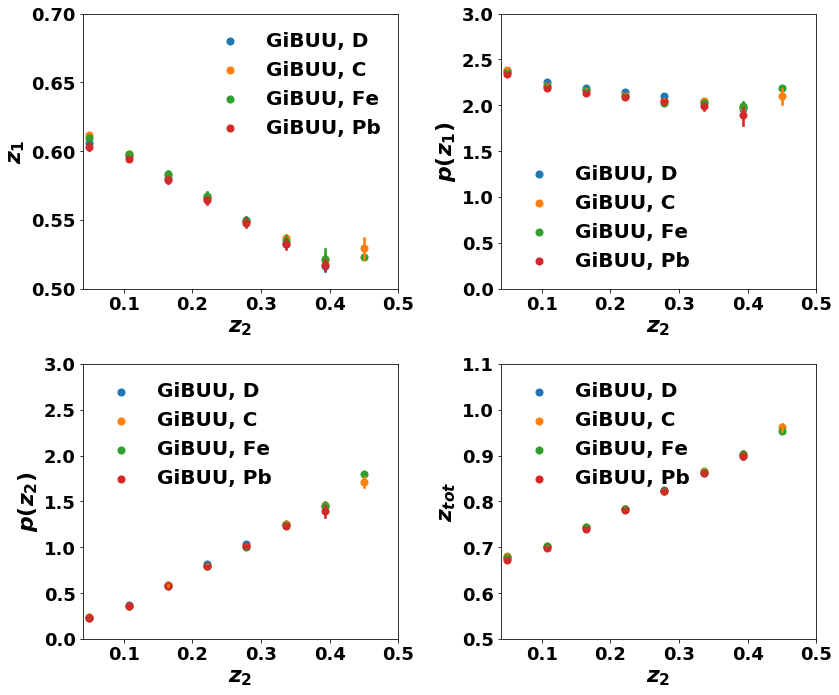

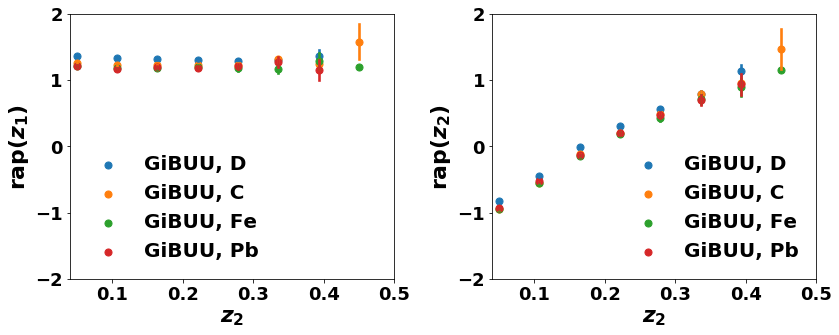

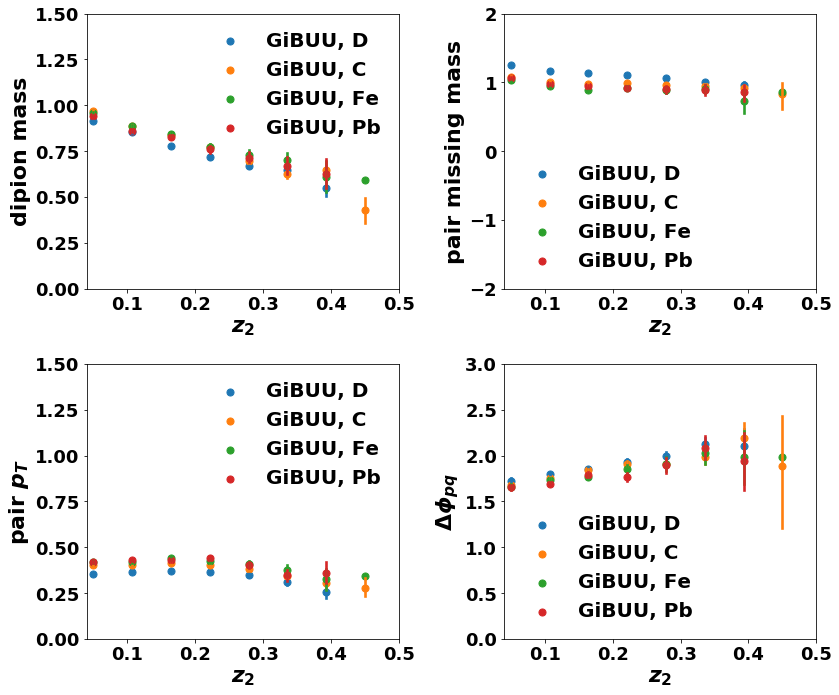

In [32]:

fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPosPions_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.04,0.5])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_1_posPions_GiBUU.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_1_posPions_GiBUU.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPosPions_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)

    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')    
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_2_posPions_GiBUU.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_2_posPions_GiBUU.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,5))
labelsy=['rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_rap','h2_rap']):  
    plt.subplot(1,2,ivar+1)
    query = queryAllPosPions_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')     

    if ivar==0:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==1:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)    

plt.tight_layout()
plt.savefig('ProfilePlots_z2_3_posPions_GiBUU.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_3_posPions_GiBUU.pdf', bbox_inches='tight')     


fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$\Delta \phi_{pq}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2','pair_pt','dphi']):   
    plt.subplot(2,2,ivar+1) 
    query = queryAllPosPions_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')   
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=0)      

plt.tight_layout()
plt.savefig('ProfilePlots_z2_4_posPions_GiBUU.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_4_posPions_GiBUU.pdf', bbox_inches='tight')     



**As a function of $\Delta \phi$  (GiBUU $\pi^{+}$ only)**

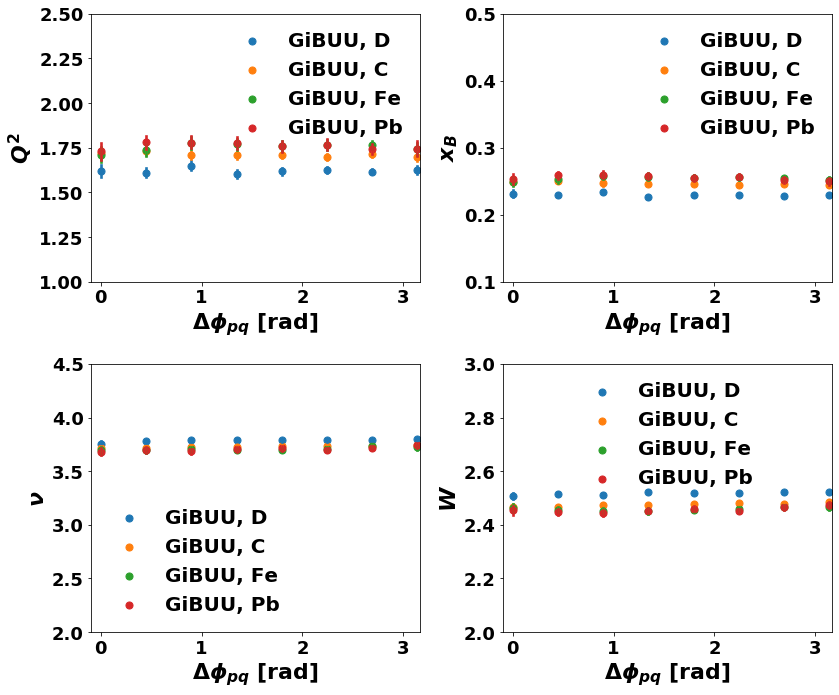

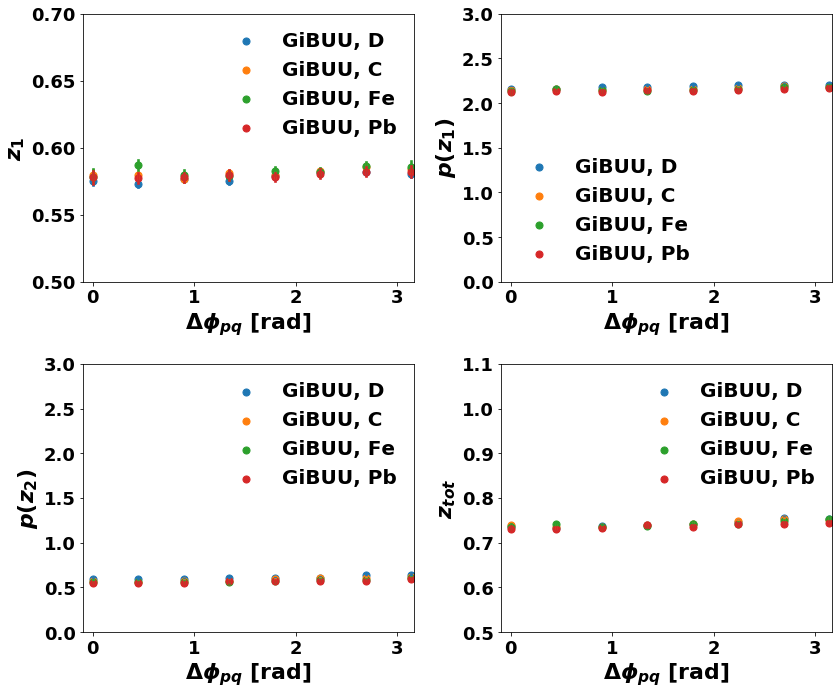

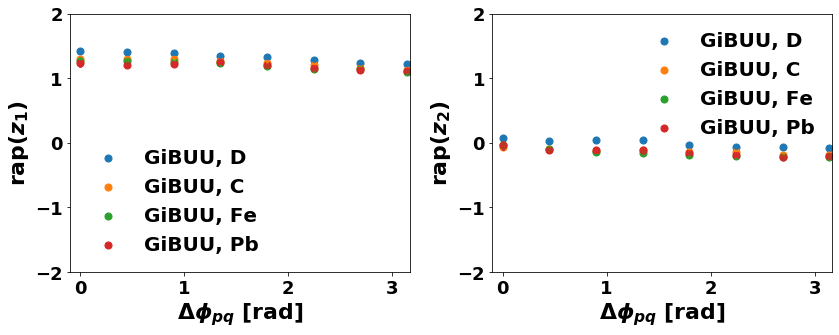

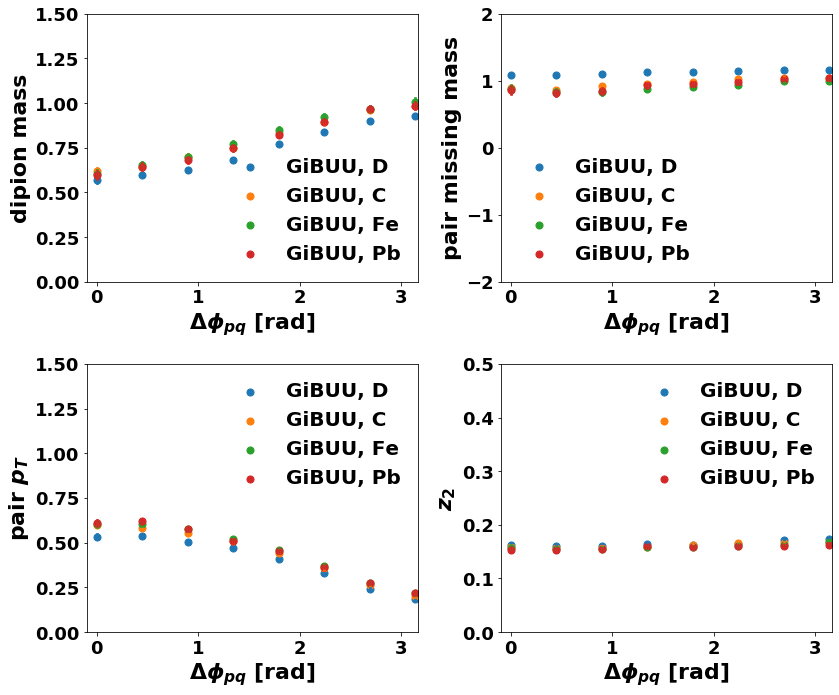

In [33]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPosPions_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_posPions_GiBUU_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_posPions_GiBUU_1.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPosPions_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])  
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_posPions_GiBUU_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_posPions_GiBUU_2.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,5))
labelsy=['rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_rap','h2_rap']):  
    plt.subplot(1,2,ivar+1)          
    query = queryAllPosPions_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==1:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_posPions_GiBUU_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_posPions_GiBUU_3.pdf', bbox_inches='tight')  

fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllPosPions_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])       
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_posPions_GiBUU_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_posPions_GiBUU_4.pdf', bbox_inches='tight') 


**As a function of dipion Inv Mass (GiBUU $\pi^{+}$ only)**

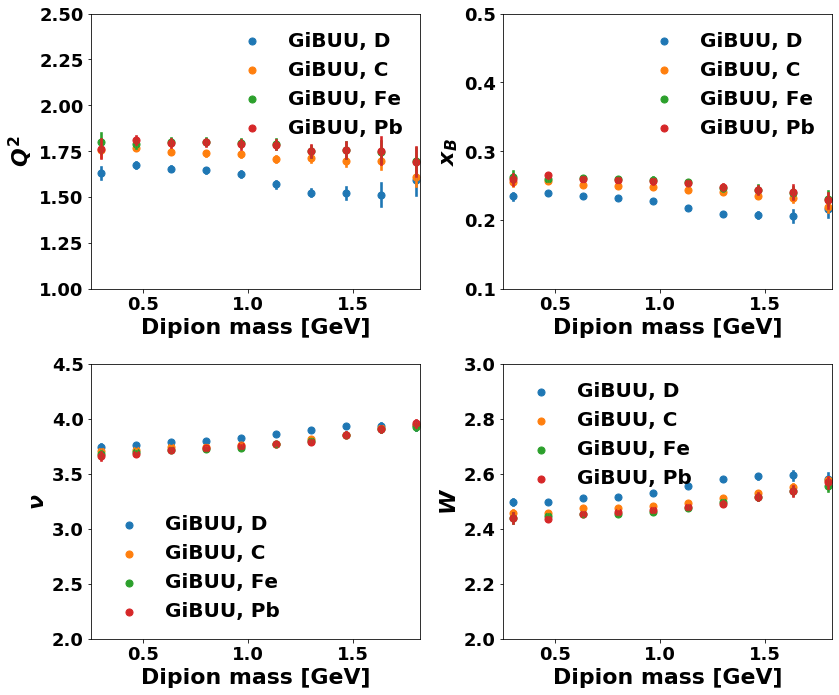

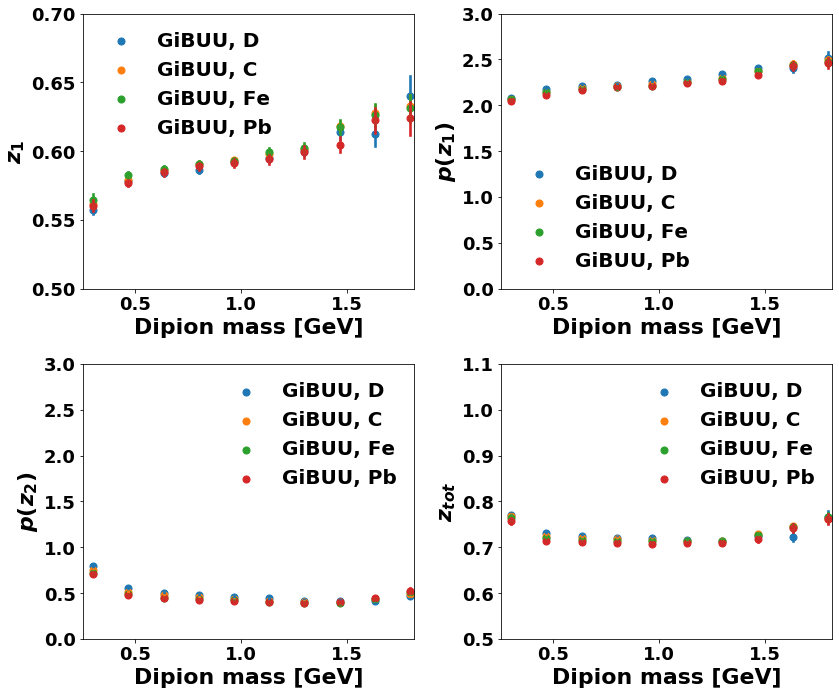

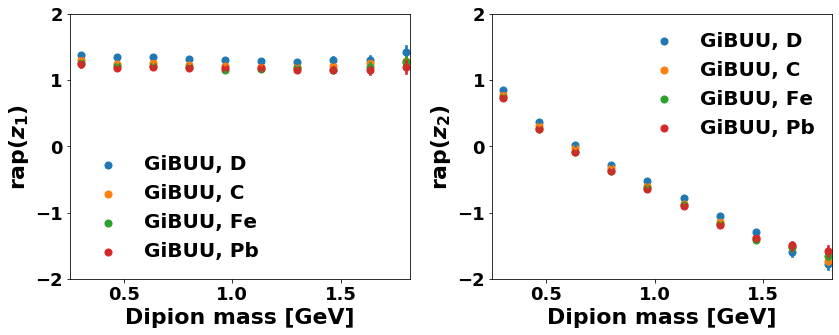

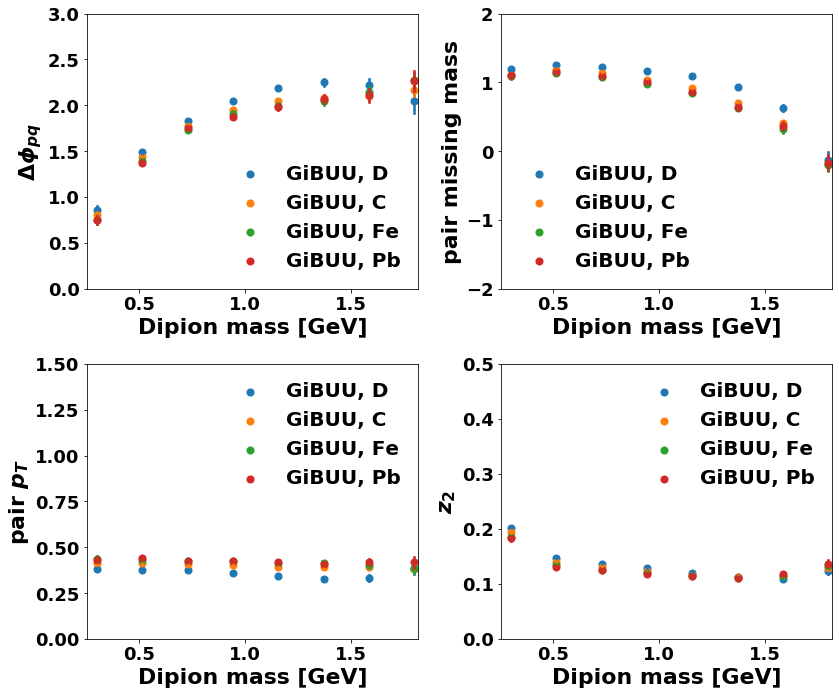

In [34]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllPosPions_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])  
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)

plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_posPions_GiBUU_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_posPions_GiBUU_1.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllPosPions_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])   
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_posPions_GiBUU_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_posPions_GiBUU_2.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,5))
labelsy=['rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_rap','h2_rap']):  
    plt.subplot(1,2,ivar+1)                   
    query = queryAllPosPions_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])

    if ivar==0:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==1:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  
    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_posPions_GiBUU_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_posPions_GiBUU_3.pdf', bbox_inches='tight')  


fig = plt.figure(figsize=(12,10))
labelsy=[r'$\Delta \phi_{pq}$','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['dphi','mx_eh1h2','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllPosPions_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,8),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82]) 
    if ivar==0:    
        plt.gca().set_ylim(top=3)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)      
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_posPions_GiBUU_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_posPions_GiBUU_4.pdf', bbox_inches='tight') 


# Only $\pi^{-}$ (GiBUU)

**As a function of $z_{2}$ (GiBUU $\pi^{-}$ only)**

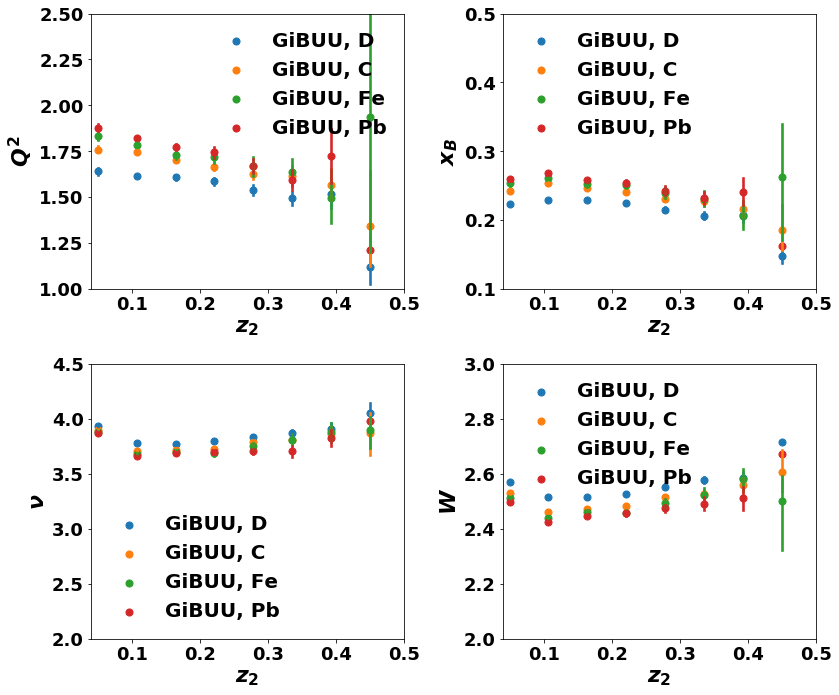

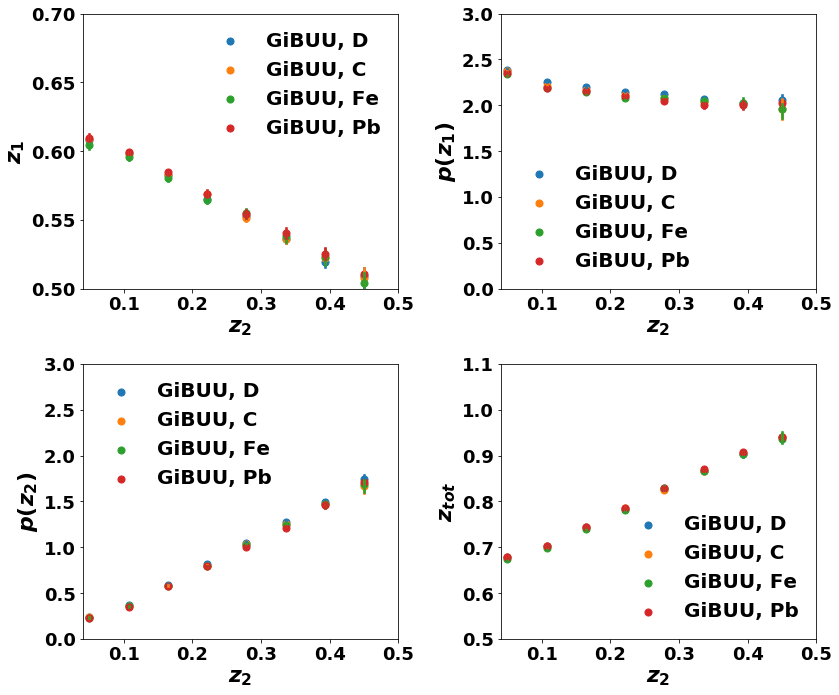

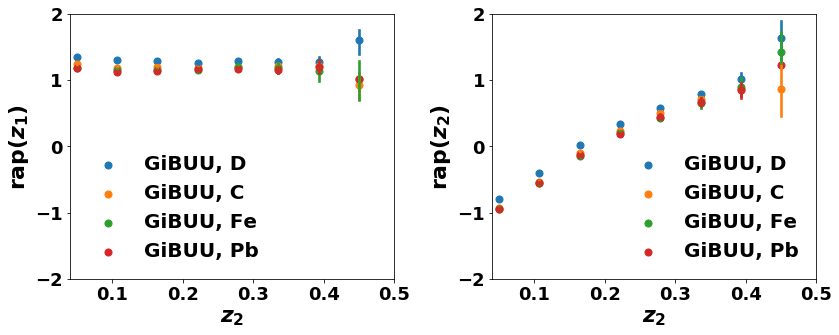

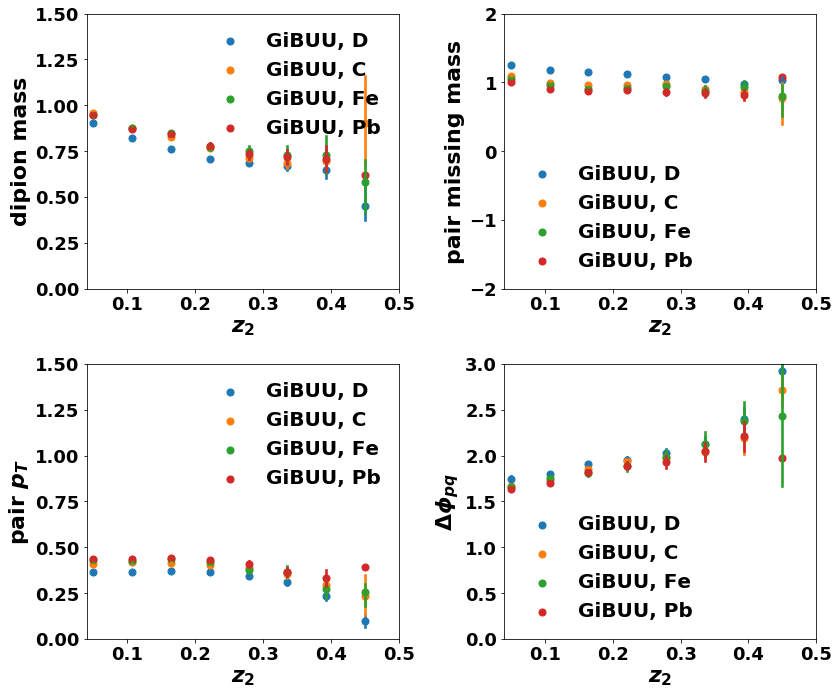

In [35]:

fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllNegPions_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.04,0.5])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_1_negPions_GiBUU.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_1_negPions_GiBUU.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllNegPions_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)

    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')    
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_z2_2_negPions_GiBUU.png', bbox_inches='tight')
plt.savefig('ProfilePlots_z2_2_negPions_GiBUU.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,5))
labelsy=['rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_rap','h2_rap']):  
    plt.subplot(1,2,ivar+1)
    query = queryAllNegPions_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')     

    if ivar==0:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==1:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)    

plt.tight_layout()
plt.savefig('ProfilePlots_z2_3_negPions_GiBUU.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_3_negPions_GiBUU.pdf', bbox_inches='tight')     


fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$\Delta \phi_{pq}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2','pair_pt','dphi']):   
    plt.subplot(2,2,ivar+1) 
    query = queryAllNegPions_GiBUU+' and h2_z>0.05 and h2_z<0.45'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['h2_z'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.05,0.45,8),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlim([0.04,0.5])
    plt.xlabel(r'$z_{2}$',fontsize=22)
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')   
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=0)      

plt.tight_layout()
plt.savefig('ProfilePlots_z2_4_negPions_GiBUU.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_z2_4_negPions_GiBUU.pdf', bbox_inches='tight')     



**As a function of $\Delta \phi$  (GiBUU $\pi^{-}$ only)**

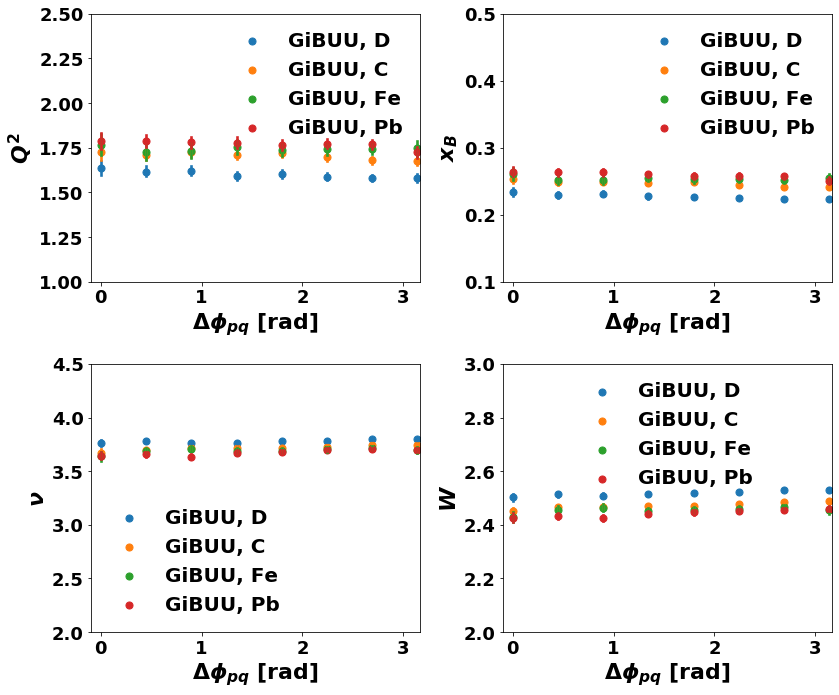

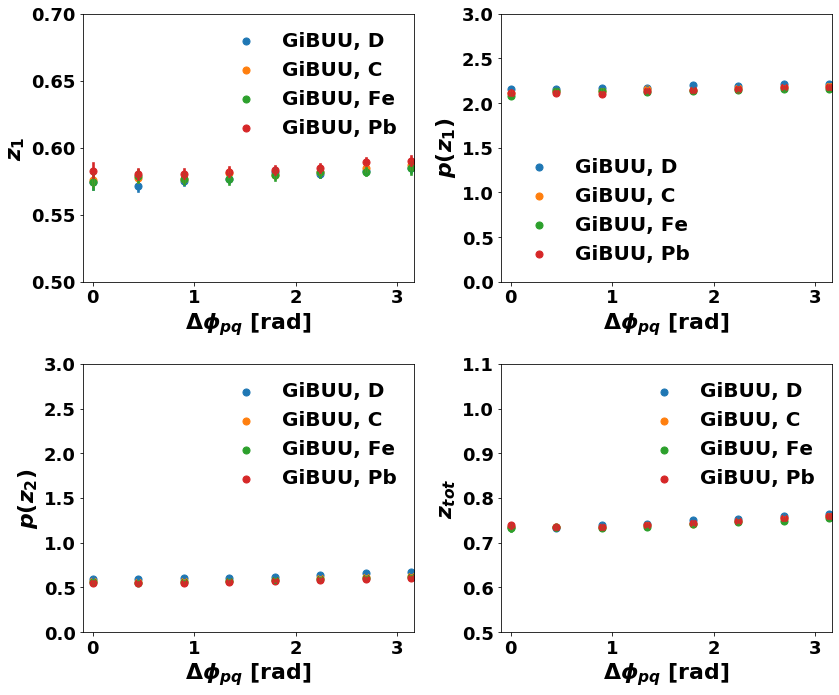

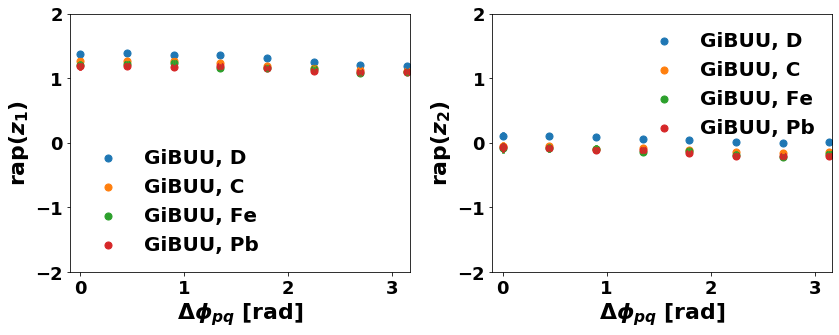

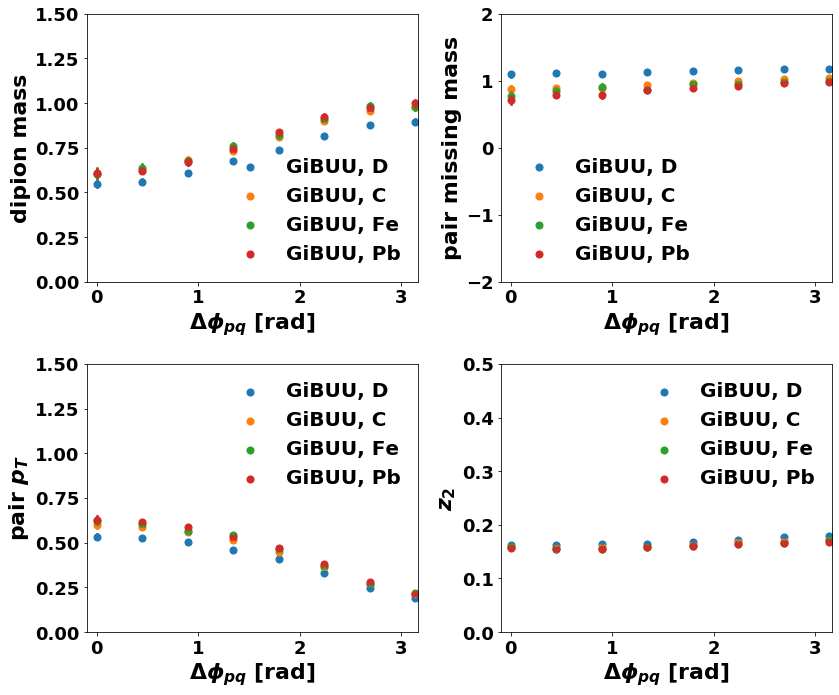

In [36]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllNegPions_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_negPions_GiBUU_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_negPions_GiBUU_1.pdf', bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllNegPions_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])  
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)
plt.tight_layout()
plt.savefig('ProfilePlots_dphi_negPions_GiBUU_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dphi_negPions_GiBUU_2.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,5))
labelsy=['rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_rap','h2_rap']):  
    plt.subplot(1,2,ivar+1)          
    query = queryAllNegPions_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])
    if ivar==0:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==1:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_negPions_GiBUU_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_negPions_GiBUU_3.pdf', bbox_inches='tight')  

fig = plt.figure(figsize=(12,10))
labelsy=['dipion mass','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['pair_mass','mx_eh1h2','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllNegPions_GiBUU + 'and  h2_z>0.1'
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['dphi'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0,3.14,8),fit_reg=None,label='GiBUU, %s'%target)
    
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'$\Delta \phi_{pq}$ [rad]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([-0.1,3.17])       
    if ivar==0:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)  

plt.tight_layout()
plt.savefig('ProfilePlots_dphi_negPions_GiBUU_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dphi_negPions_GiBUU_4.pdf', bbox_inches='tight') 


**As a function of dipion Inv Mass (GiBUU $\pi^{-}$ only)**

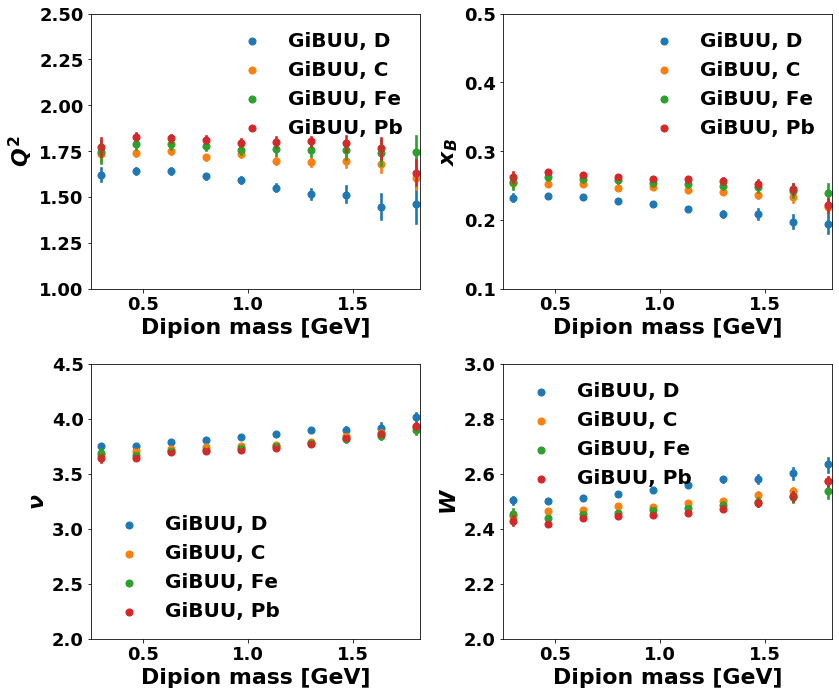

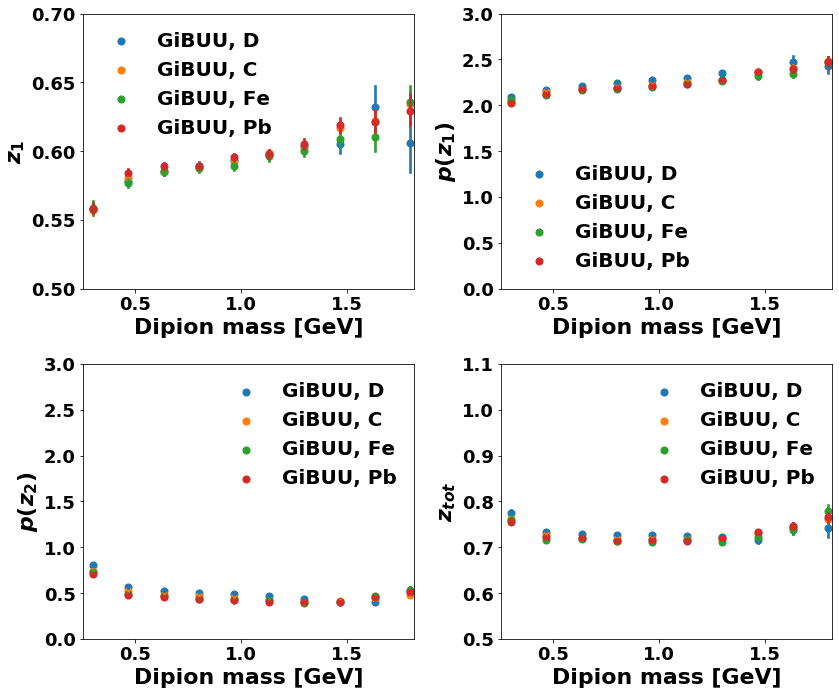

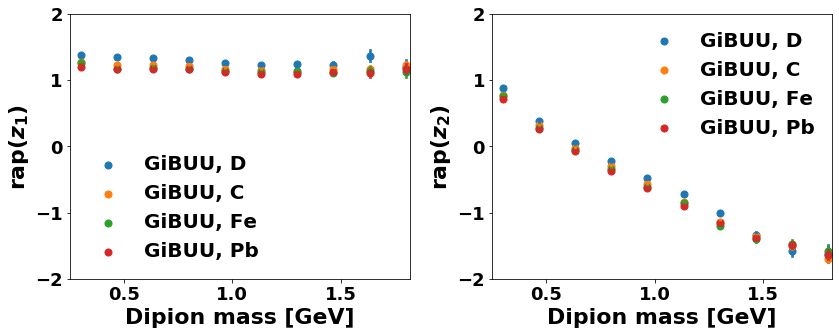

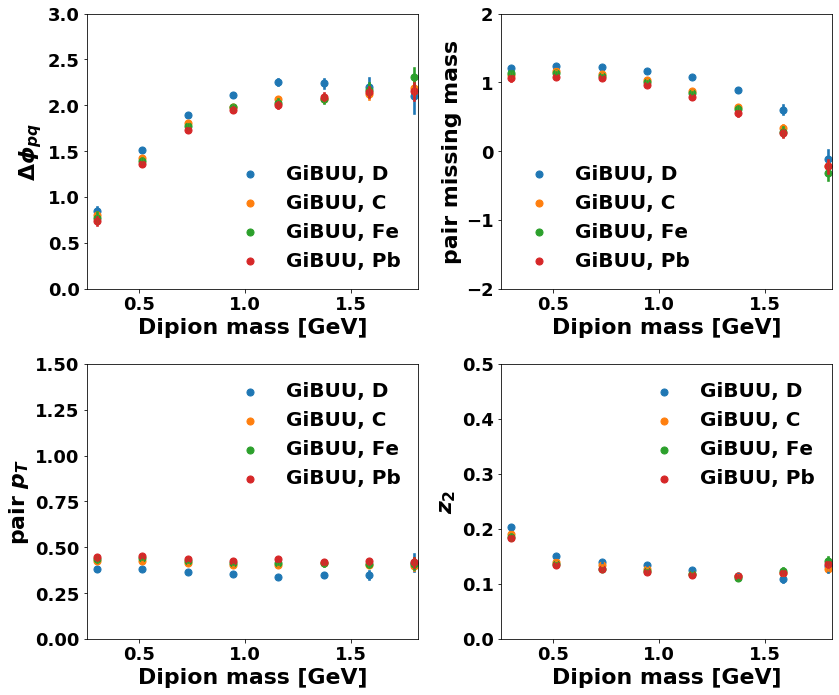

In [37]:
fig = plt.figure( figsize=(12, 10))
labelsy=['$Q^{2}$','$x_{B}$',r'$\nu$','$W$']
for ivar,variable in enumerate(['Q2','x','nu','W']):
    plt.subplot(2,2,ivar+1)
    query = queryAllNegPions_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])  
    if ivar==0:    
        plt.gca().set_ylim(top=2.5)
        plt.gca().set_ylim(bottom=1)
    if ivar==1:    
        plt.gca().set_ylim(top=0.5)
        plt.gca().set_ylim(bottom=0.1)
    if ivar==2:    
        plt.gca().set_ylim(top=4.5)
        plt.gca().set_ylim(bottom=2)
    if ivar==3:    
        plt.gca().set_ylim(top=3)  
        plt.gca().set_ylim(bottom=2)

plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_negPions_GiBUU_1.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_negPions_GiBUU_1.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,10))
labelsy=['$z_{1}$','$p(z_{1})$','$p(z_{2})$','$z_{tot}$']
for ivar,variable in enumerate(['h1_z','h1_p','h2_p', 'h_z']):
    plt.subplot(2,2,ivar+1)     
    query = queryAllNegPions_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])   
    if ivar==0:    
        plt.gca().set_ylim(top=0.7)
        plt.gca().set_ylim(bottom=0.5)
    if ivar==1:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==2:    
        plt.gca().set_ylim(top=3.)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=1.1)  
        plt.gca().set_ylim(bottom=0.5)    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_negPions_GiBUU_2.png', bbox_inches='tight')
plt.savefig('ProfilePlots_dpionMass_negPions_GiBUU_2.pdf', bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(12,5))
labelsy=['rap($z_{1}$)','rap($z_{2}$)']
for ivar,variable in enumerate(['h1_rap','h2_rap']):  
    plt.subplot(1,2,ivar+1)                   
    query = queryAllNegPions_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,10),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82])

    if ivar==0:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2.)
    if ivar==1:    
        plt.gca().set_ylim(top=2)  
        plt.gca().set_ylim(bottom=-2)  
    
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_negPions_GiBUU_3.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_negPions_GiBUU_3.pdf', bbox_inches='tight')  


fig = plt.figure(figsize=(12,10))
labelsy=[r'$\Delta \phi_{pq}$','pair missing mass','pair $p_{T}$',r'$z_{2}$']
for ivar,variable in enumerate(['dphi','mx_eh1h2','pair_pt','h2_z']):   
    plt.subplot(2,2,ivar+1)                   
    query = queryAllNegPions_GiBUU
    for i, target in enumerate(['D','C','Fe','Pb']):
        sns.regplot(x=df['GiBUU_%s'%target].query(query)['pair_mass'],y=df['GiBUU_%s'%target].query(query)[variable],
                    x_bins=np.linspace(0.3,1.8,8),fit_reg=None,label='GiBUU, %s'%target)
    plt.legend(loc='best',frameon=False)
    plt.xlabel(r'Dipion mass [GeV]',fontsize=22,fontweight='bold')
    plt.ylabel(labelsy[ivar],fontsize=22,fontweight='bold')
    plt.xlim([0.25,1.82]) 
    if ivar==0:    
        plt.gca().set_ylim(top=3)
        plt.gca().set_ylim(bottom=0.)
    if ivar==1:    
        plt.gca().set_ylim(top=2.)
        plt.gca().set_ylim(bottom=-2)
    if ivar==2:    
        plt.gca().set_ylim(top=1.5)
        plt.gca().set_ylim(bottom=0.)
    if ivar==3:    
        plt.gca().set_ylim(top=0.5)  
        plt.gca().set_ylim(bottom=0)      
plt.tight_layout()
plt.savefig('ProfilePlots_dpionMass_negPions_GiBUU_4.png', bbox_inches='tight')     
plt.savefig('ProfilePlots_dpionMass_negPions_GiBUU_4.pdf', bbox_inches='tight') 


# <span style="color:red">2D Distributions control plots</span>

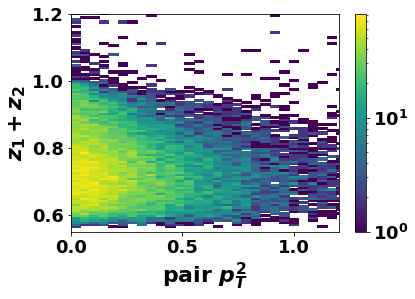

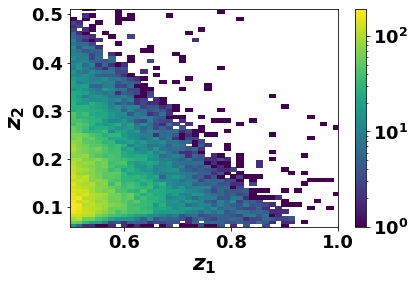

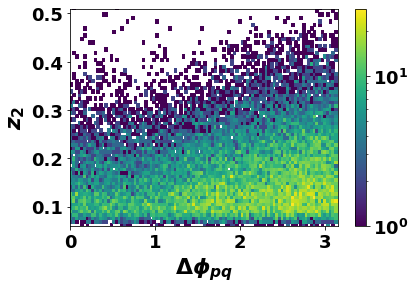

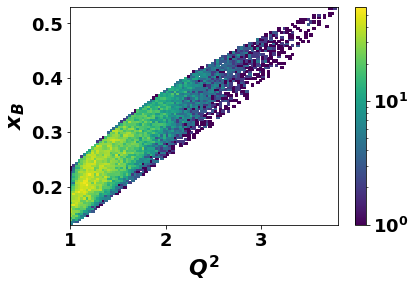

In [45]:
query = 'Q2>1 %s'%pair_cut_nom
h =plt.hist2d(df['Fe'].query(query)['pair_pt2'], df['Fe'].query(query)['h_z'], 
              bins=(400, 200), cmap=plt.cm.viridis, norm=LogNorm())
plt.xlim(0,1.2) 
plt.ylim(0.55,1.2) 
plt.colorbar()
plt.xlabel('pair $p_{T}^2$', fontsize=22,fontweight='bold')
plt.ylabel('$z_{1}+z_{2}$', fontsize=22,fontweight='bold')
plt.savefig('2D_paitPt2_ztot.png', bbox_inches='tight')  
plt.show()

h =plt.hist2d(df['Fe'].query(query)['h1_z'], df['Fe'].query(query)['h2_z'], 
              bins=(100, 100), cmap=plt.cm.viridis, norm=LogNorm())
plt.xlim(0.5,1.) 
plt.ylim(0.06,0.51) 
plt.colorbar()
plt.xlabel('$z_{1}$', fontsize=22,fontweight='bold')
plt.ylabel('$z_{2}$', fontsize=22,fontweight='bold')
#plt.savefig('2D_paitPt2_ztot.png', bbox_inches='tight')  
plt.show()

h =plt.hist2d(df['Fe'].query(query)['dphi'], df['Fe'].query(query)['h2_z'], 
              bins=(100, 100), cmap=plt.cm.viridis, norm=LogNorm())
plt.xlim(0.,3.15) 
plt.ylim(0.06,0.51) 
plt.colorbar()
plt.xlabel('$\Delta \phi_{pq}$', fontsize=22,fontweight='bold')
plt.ylabel('$z_{2}$', fontsize=22,fontweight='bold')
#plt.savefig('2D_paitPt2_ztot.png', bbox_inches='tight')  
plt.show()

h =plt.hist2d(df['Fe'].query(query)['Q2'], df['Fe'].query(query)['x'], 
              bins=(100, 100), cmap=plt.cm.viridis , norm=LogNorm())
plt.xlim(1.,3.8) 
plt.ylim(0.13,0.53) 
plt.colorbar()
plt.xlabel('$Q^2$', fontsize=22,fontweight='bold')
plt.ylabel('$x_{B}$', fontsize=22,fontweight='bold')
#plt.savefig('2D_paitPt2_ztot.png', bbox_inches='tight')  
plt.show()


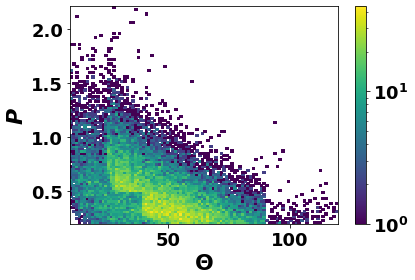

In [41]:
query = 'Q2>1 %s'%pair_cut_nom
h =plt.hist2d(df['Fe'].query(query)['h2_th'], df['Fe'].query(query)['h2_p'], 
              bins=(100, 100), cmap=plt.cm.viridis , norm=LogNorm()  )
#plt.xlim(10.,120) 
#plt.ylim(0.13,0.63) 
plt.colorbar(h[3])
plt.xlabel('$\Theta$', fontsize=22,fontweight='bold')
plt.ylabel('$P$', fontsize=22,fontweight='bold')
#plt.savefig('2D_paitPt2_ztot.png', bbox_inches='tight')  
plt.show()


In [ ]:
print(df['C'].keys())

In [ ]:
print(df['GiBUU_C'].keys())